#### importing libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Dataset
df=pd.read_csv("Attrition data (1).csv")

In [3]:
df.shape

(4410, 29)

In [5]:
# displays the top 5 columns of the dataframe
df.head()

EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
0                 6          2  Life Sciences              1  Female   
1                10          1  Life Sciences              1  Female   
2                17          4          Other              1    Male   
3                 2          5  Life Sciences              1    Male   
4                10          1        Medical              1    Male   

   JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0         1  Healthcare Representative       Married         131160   
1         1         Research Scientist        Single          41890   
2         4            Sales Executive       Married         193280   
3         3            Human Resources       Married          83210   
4         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                 1.0      Y                 11              8   
1                 0.0      Y                 23              8   
2                 1.0      Y                 15              8   
3                 3.0      Y                 11              8   
4                 4.0      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3

In [5]:
## droping EmployeeID,StandardHours,Over18,EmployeeCount columns
df=df.drop(['EmployeeID','StandardHours','Over18','EmployeeCount'],axis=1)
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  Gender  JobLevel                    JobRole  \
0          2  Life Sciences  Female         1  Healthcare Representative   
1          1  Life Sciences  Female         1         Research Scientist   
2          4          Other    Male         4            Sales Executive   
3          5  Life Sciences    Male         3            Human Resources   
4          1        Medical    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0       Married         131160                 1.0                 11   
1        Single          41890                 0.0                 23   
2       Married         193280                 1.0                 15   
3       Married          83210                 3.0                 11   
4        Single          23420                 4.0                 12   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3

## Understanding the Dataset

In [6]:
# no of rows and columns in the dataframe
df.shape

(4410, 25)

In [7]:
# column names of the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [8]:
# data types of each column in the dataframe
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [9]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [10]:
## giving summary stats of dataset
df.describe().T

count          mean           std      min      25%  \
Age                      4410.0     36.923810      9.133301     18.0     30.0   
DistanceFromHome         4410.0      9.192517      8.105026      1.0      2.0   
Education                4410.0      2.912925      1.023933      1.0      2.0   
JobLevel                 4410.0      2.063946      1.106689      1.0      1.0   
MonthlyIncome            4410.0  65029.312925  47068.888559  10090.0  29110.0   
NumCompaniesWorked       4391.0      2.694830      2.498887      0.0      1.0   
PercentSalaryHike        4410.0     15.209524      3.659108     11.0     12.0   
StockOptionLevel         4410.0      0.793878      0.851883      0.0      0.0   
TotalWorkingYears        4401.0     11.279936      7.782222      0.0      6.0   
TrainingTimesLastYear    4410.0      2.799320      1.288978      0.0      2.0   
YearsAtCompany           4410.0      7.008163      6.125135      0.0      3.0   
YearsSinceLastPromotion  4410.0      2.187755      3.221699      0.0      0.0   
YearsWithCurrManager     4410.0      4.123129      3.567327      0.0      2.0   
EnvironmentSatisfaction  4385.0      2.723603      1.092756      1.0      2.0   
JobSatisfaction          4390.0      2.728246      1.101253      1.0      2.0   
WorkLifeBalance          4372.0      2.761436      0.706245      1.0      2.0   
JobInvolvement           4410.0      2.729932      0.711400      1.0      2.0   
PerformanceRating        4410.0      3.153741      0.360742      3.0      3.0   

                             50%      75%       max  
Age                         36.0     43.0      60.0  
DistanceFromHome             7.0     14.0      29.0  
Education                    3.0      4.0       5.0  
JobLevel                     2.0      3.0       5.0  
MonthlyIncome            49190.0  83800.0  199990.0  
NumCompaniesWorked           2.0      4.0       9.0  
PercentSalaryHike           14.0     18.0      25.0  
StockOptionLevel             1.0      1.0       3.0  
TotalWorkingYears           10.0     15.0      40.0  
TrainingTimesLastYear        3.0      3.0       6.0  
YearsAtCompany               5.0      9.0      40.0  
YearsSinceLastPromotion      1.0      3.0      15.0  
YearsWithCurrManager         3.0      7.0      17.0  
EnvironmentSatisfaction      3.0      4.0       4.0  
JobSatisfaction              3.0      4.0       4.0  
WorkLifeBalance              3.0      3.0       4.0  
JobInvolvement               3.0      3.0       4.0  
PerformanceRating            3.0      3.0       4.0

## EDA(Exploratory Data Analysis)

In [11]:
# counting null values in each column of the dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [12]:
## dropping null values
df.dropna(how='any',inplace=True)

In [13]:
## checking for null values
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [14]:
df.shape

(4300, 25)

In [15]:
# checking duplicates if any
df.duplicated().any()

True

In [16]:
## droping dupliactes
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1470, 25)

In [18]:
df.describe()

Age  DistanceFromHome    Education     JobLevel  MonthlyIncome  \
count  1470.000000       1470.000000  1470.000000  1470.000000    1470.000000   
mean     36.923810          9.192517     2.912925     2.063946   65029.312925   
std       9.135373          8.106864     1.024165     1.106940   47079.567831   
min      18.000000          1.000000     1.000000     1.000000   10090.000000   
25%      30.000000          2.000000     2.000000     1.000000   29110.000000   
50%      36.000000          7.000000     3.000000     2.000000   49190.000000   
75%      43.000000         14.000000     4.000000     3.000000   83790.000000   
max      60.000000         29.000000     5.000000     5.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         1470.000000        1470.000000       1470.000000   
mean             2.693197          15.209524          0.793878   
std              2.498009           3.659938          0.852077   
min              0.000000          11.000000          0.000000   
25%              1.000000          12.000000          0.000000   
50%              2.000000          14.000000          1.000000   
75%              4.000000          18.000000          1.000000   
max              9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
count              1470.000000           1470.000000              1470.000000   
mean                  2.187755              4.123129                 2.721769   
std                   3.222430              3.568136                 1.093082   
min                   0.000000              0.000000                 1.000000   
25%                   0.000000              2.000000                 2.000000   
50%                   1.000000              3.000000                 3.000000   
75%                   3.000000              7.000000                 4.000000   
max                  15.000000             17.000000                 4.000000   

       JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
count      1470.000000      1470.000000     1470.000000        1470.000000  
mean          2.728571         2.761224        2.729932           3.153741  
std           1.102846         0.706476        0.711561           0.360824  
min           1.000000         1.000000        1.000000           3.000000  
25%           2.000000         2.000000        2.000000           3.000000  
50%           3.000000         3.000000        3.000000           3.000000  
75%           4.000000         3.000000        3.000000           3.000000  
max           4.000000         4.000000        4.000000           4.000000

In [19]:
categorical_features=[]
for i in df.columns:
    if(df[i].nunique()<15):
        categorical_features.append(i)
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

In [20]:
numerical_features=[]
for i in df.columns:
    if(df[i].nunique()>=15):
        numerical_features.append(i)
numerical_features

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Data Visualization

In [21]:
from scipy import stats
from statsmodels.api import qqplot

In [22]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[col_name].unique(),
        shadow=True,

        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [23]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [24]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [25]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Attrition", data=df, ax=axes[0][0], palette="viridis_r"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Attrition", data=df, ax=axes[0][1], split=True, palette="viridis_r"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Attrition", data=df, ax=axes[1][0], palette="viridis_r"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="Attrition", data=df, hue="Attrition", palette="viridis_r"
    )  # displays barplot of the given dataframe column respect to 'HeartDisease' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [26]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Attrition", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

### plots a 1 x 2 subplot contains (pie plot and bar plot) for each numerical columns

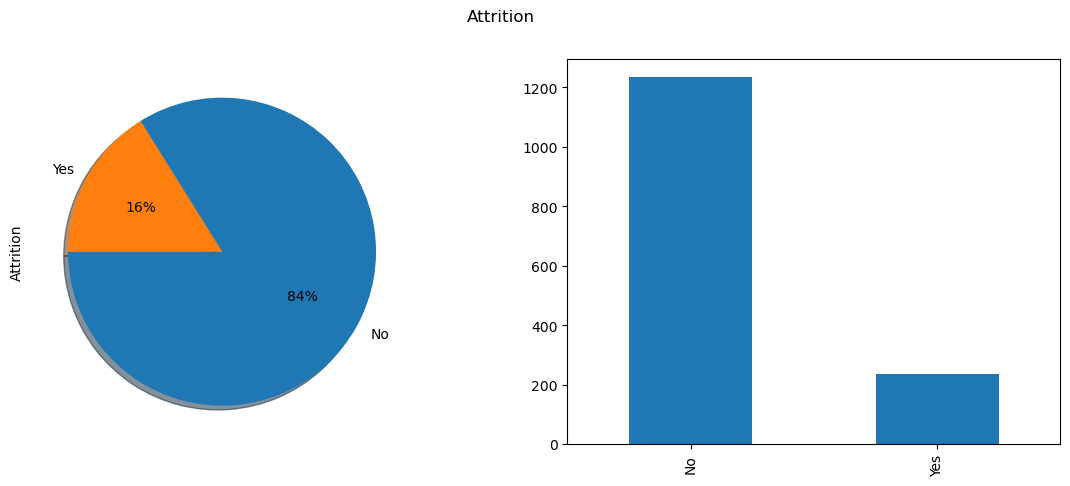

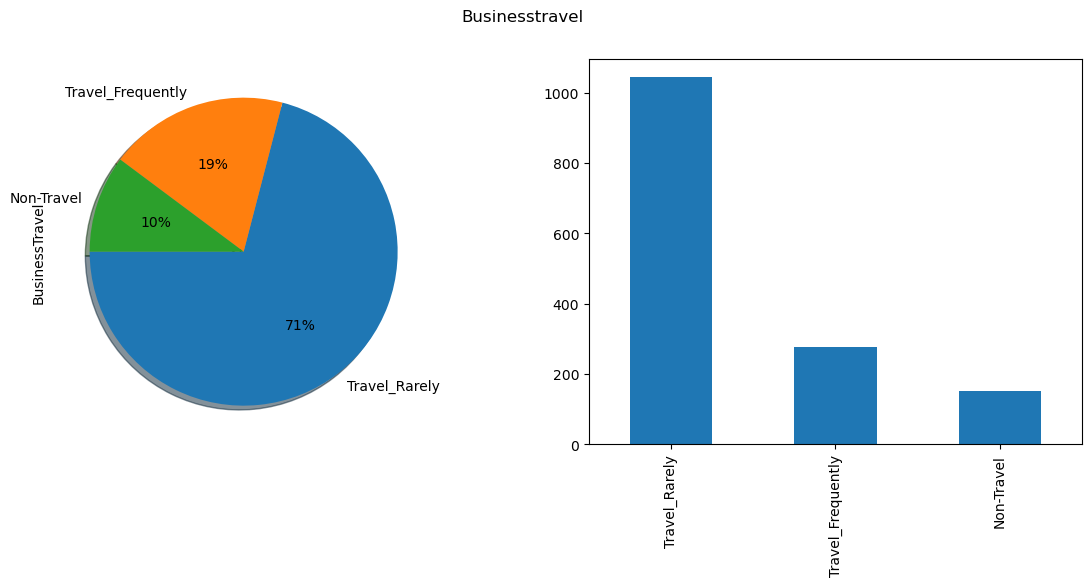

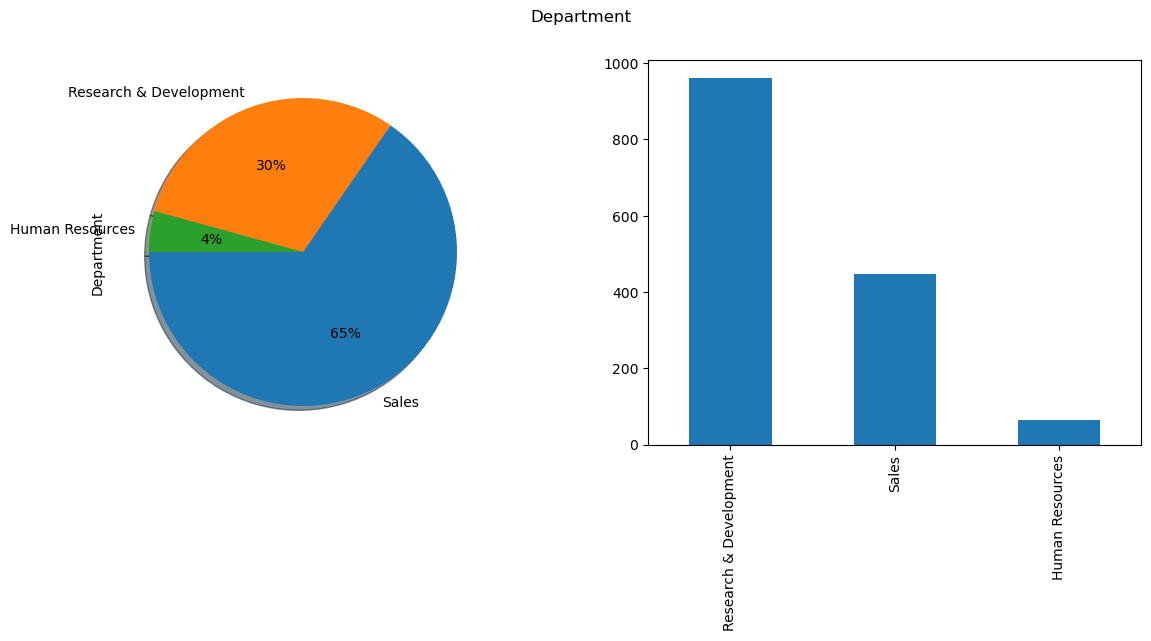

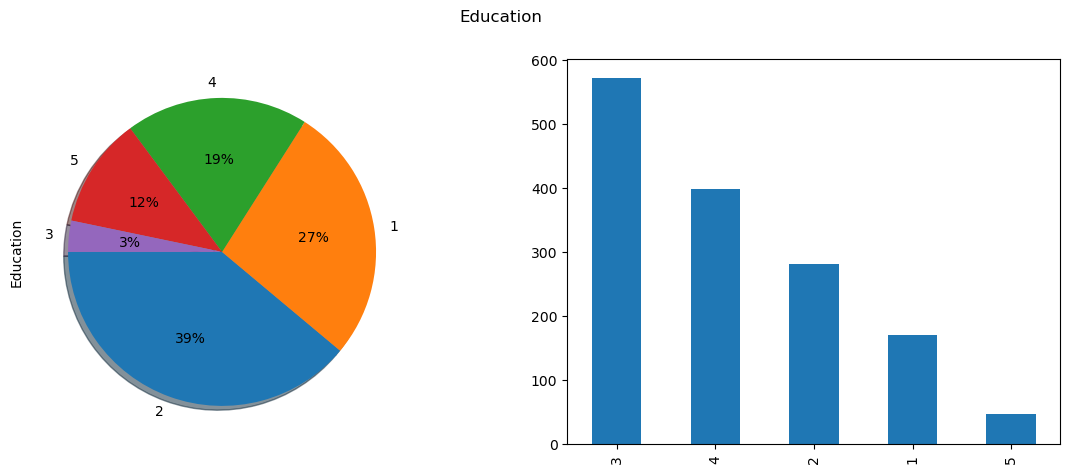

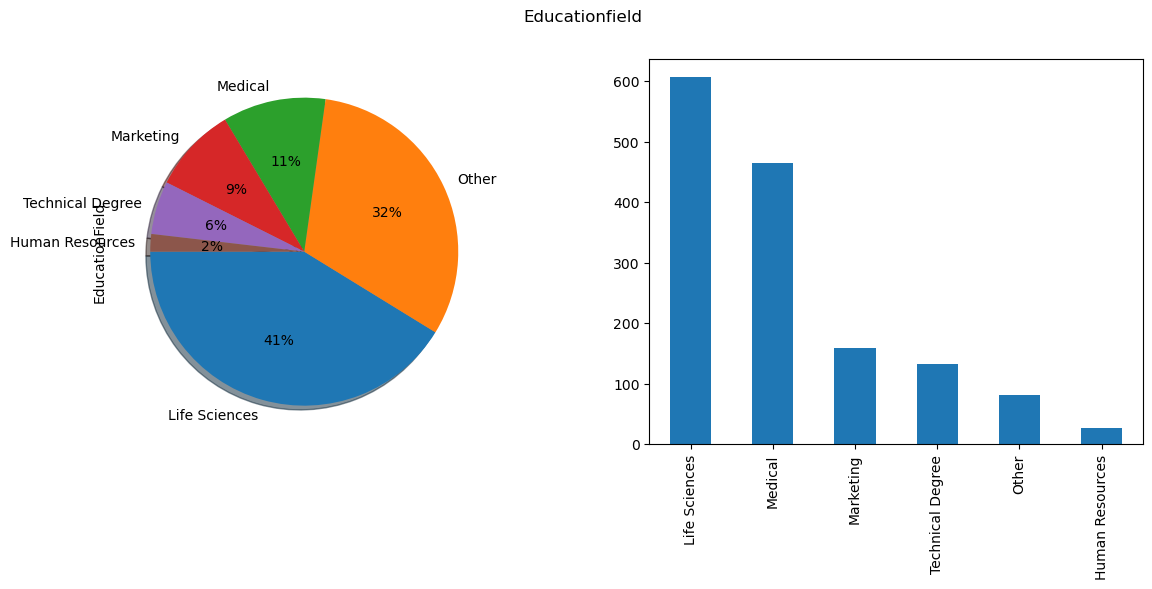

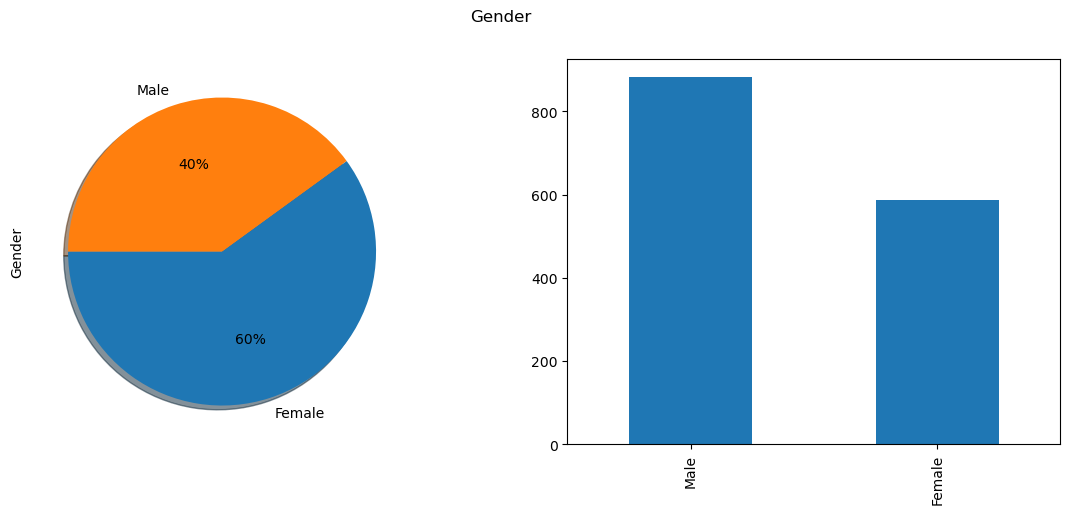

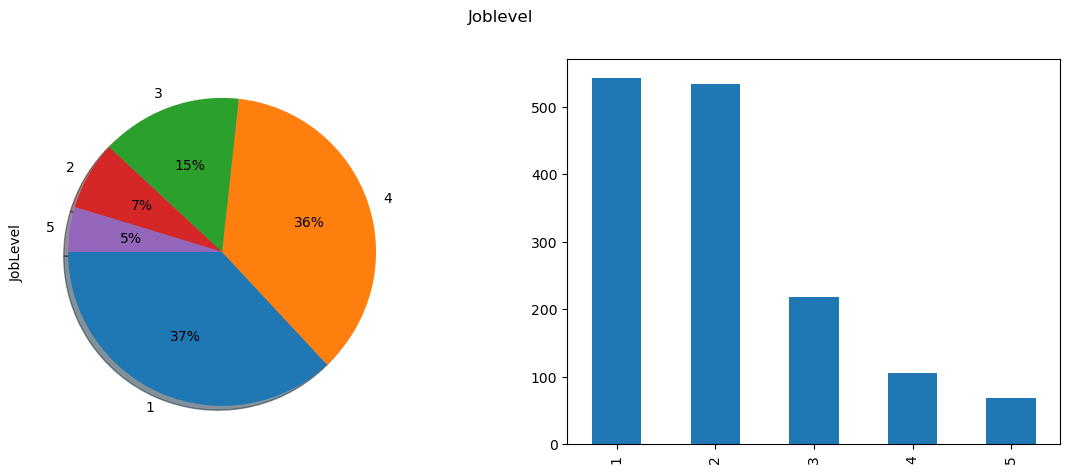

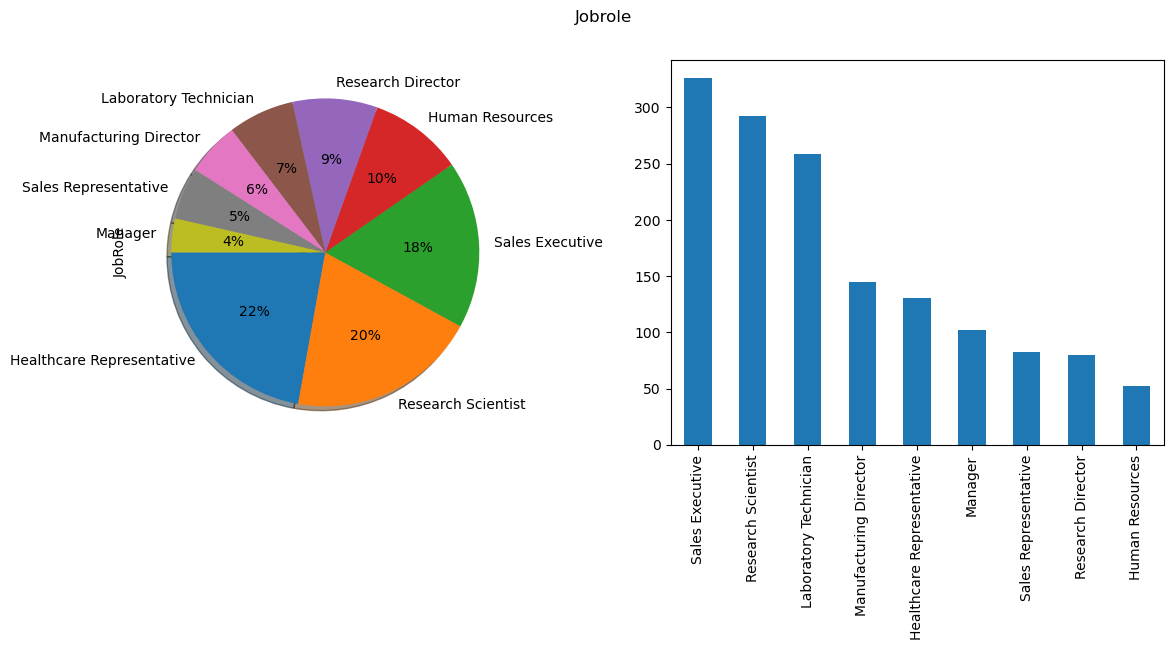

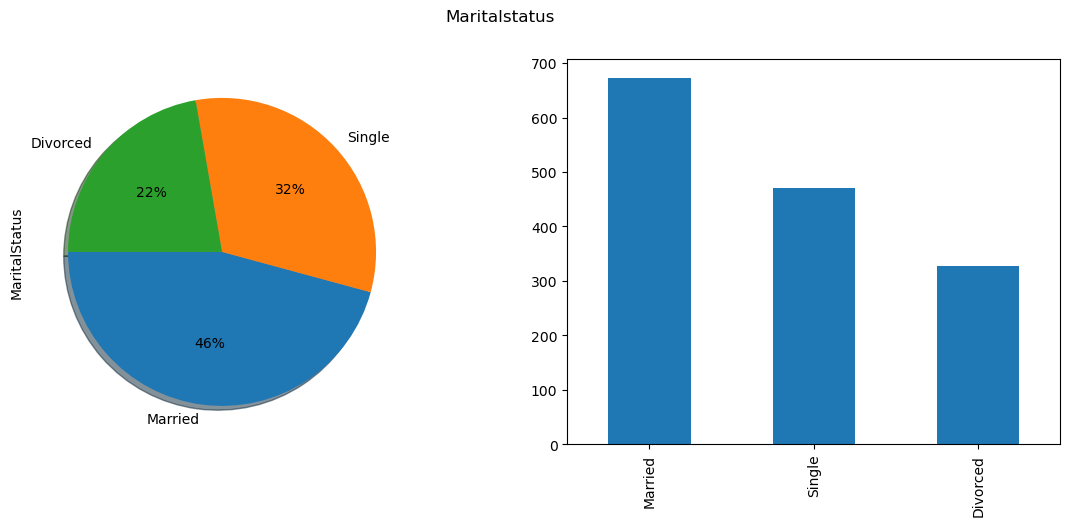

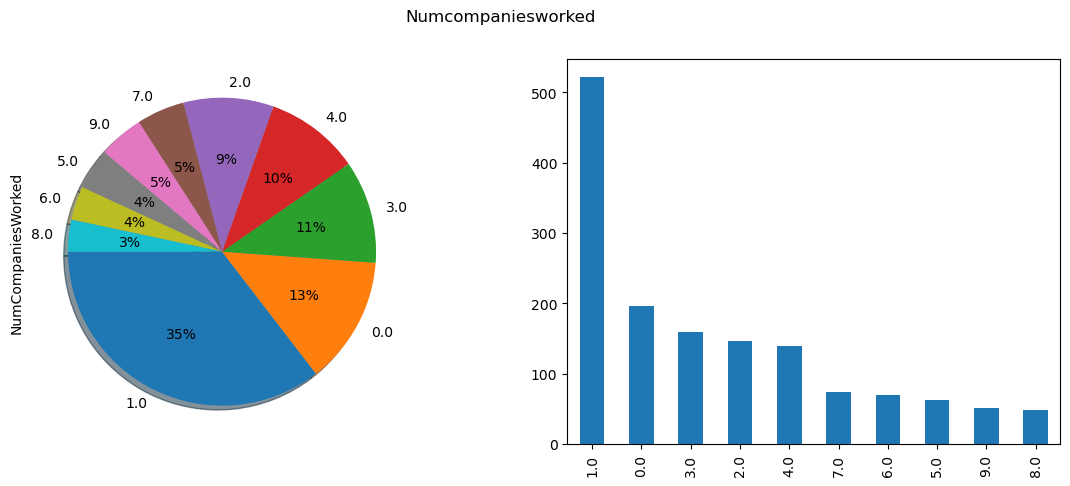

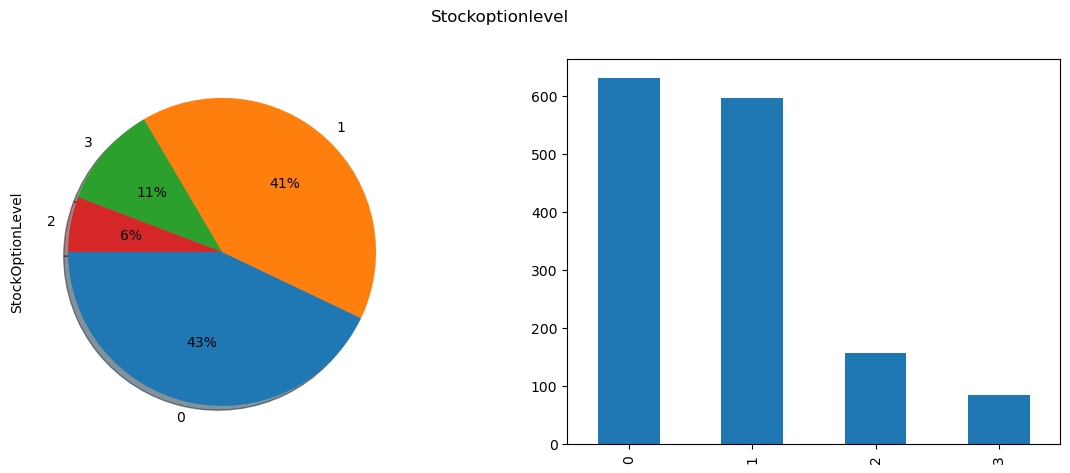

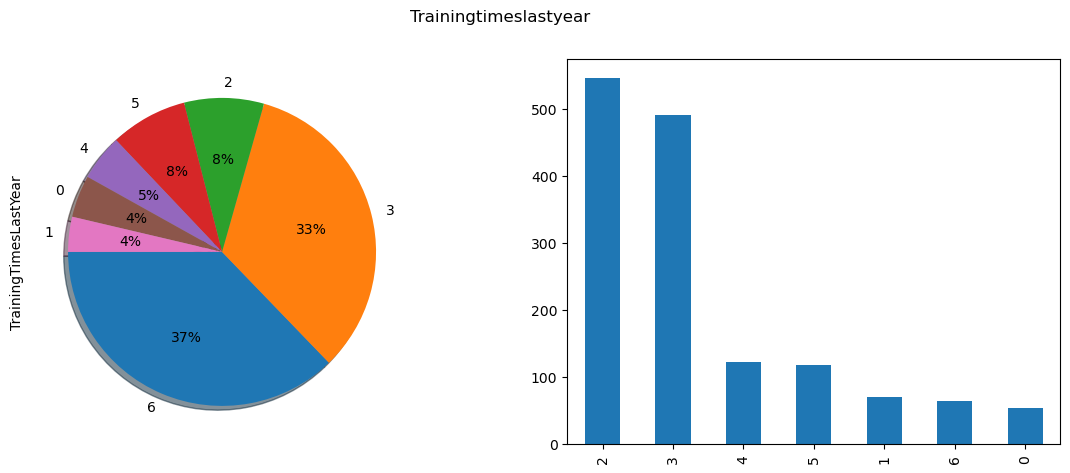

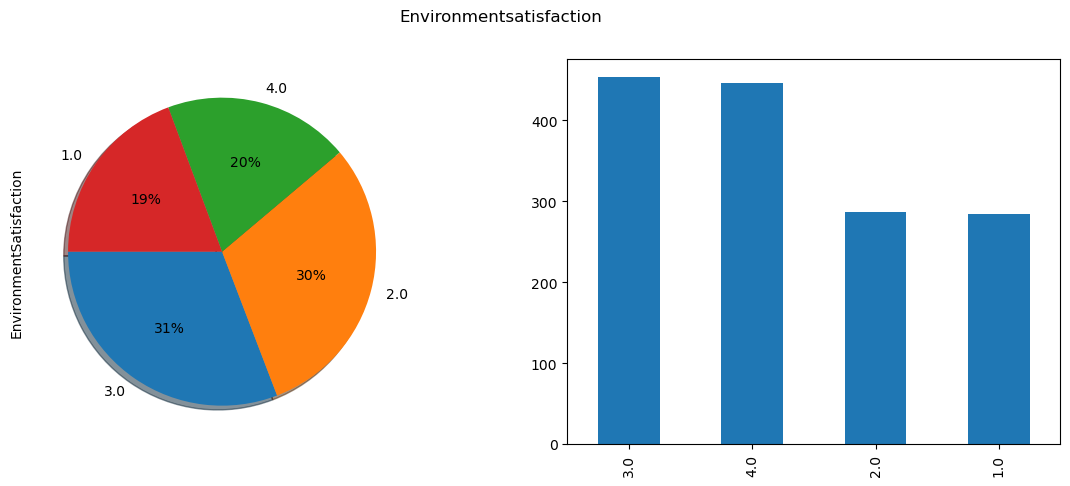

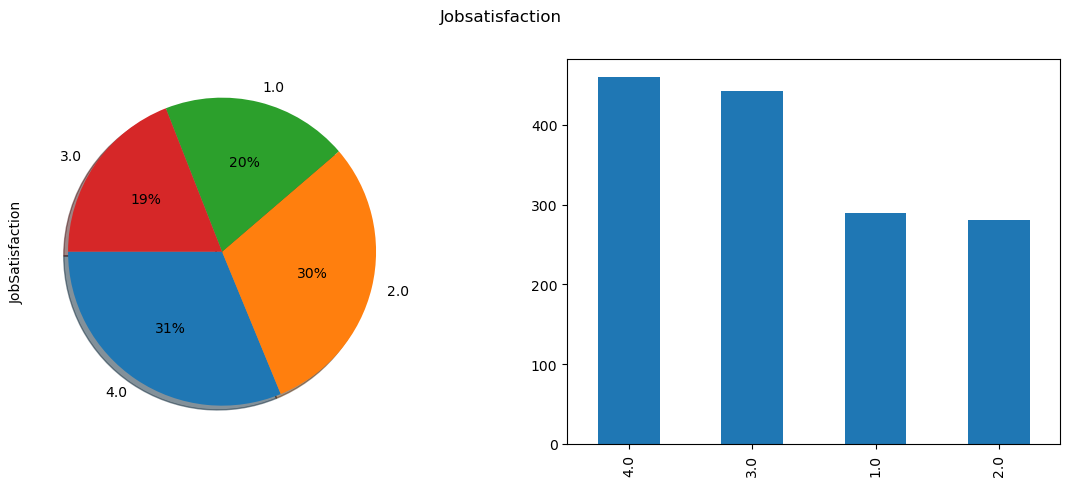

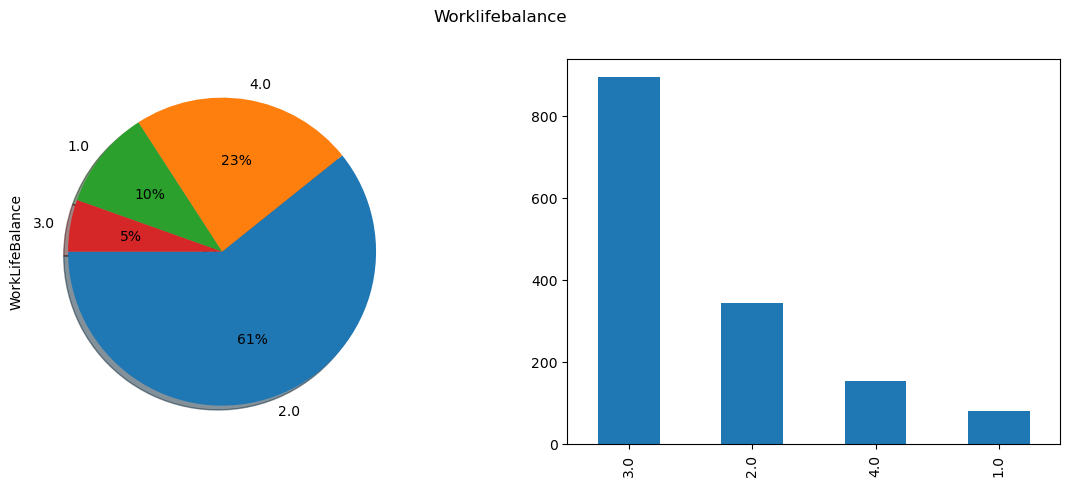

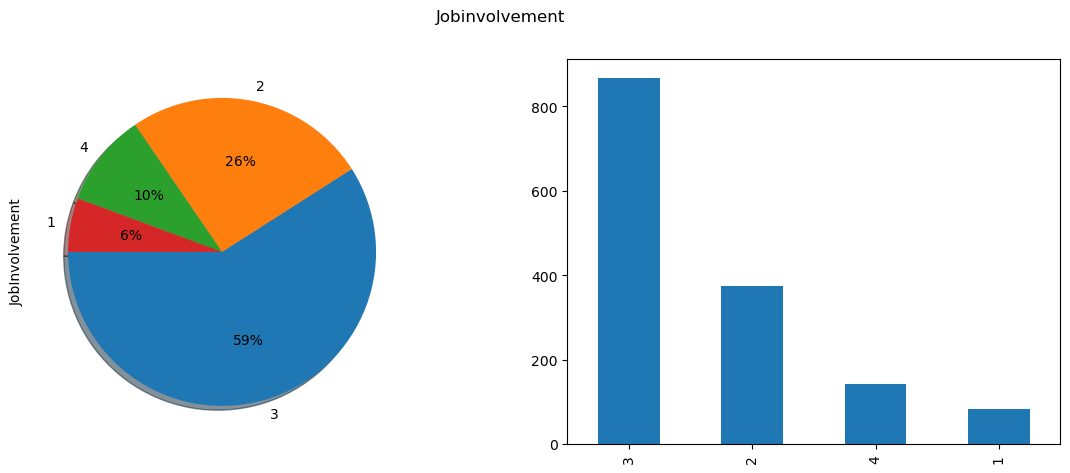

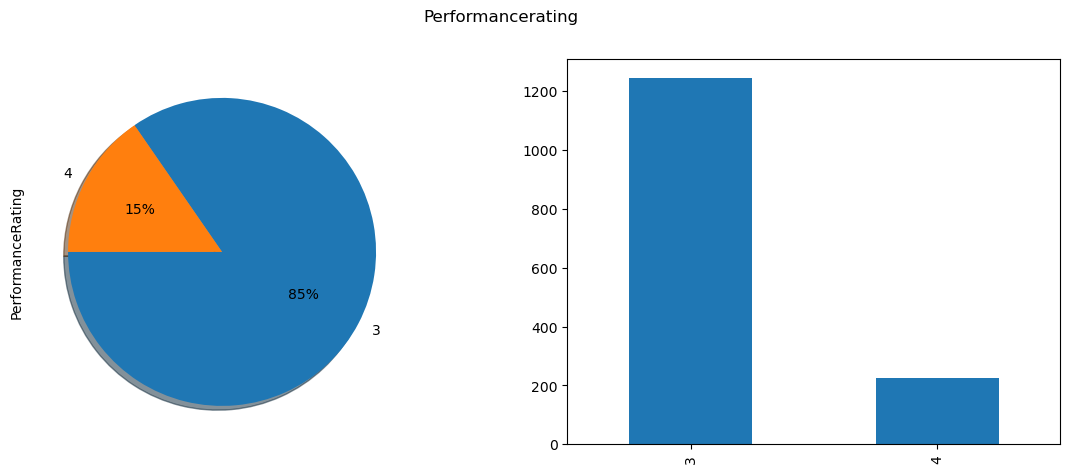

In [27]:
for i in categorical_features:
    plot_categorial(i)

### Kernel density estimate plot for each numerical features

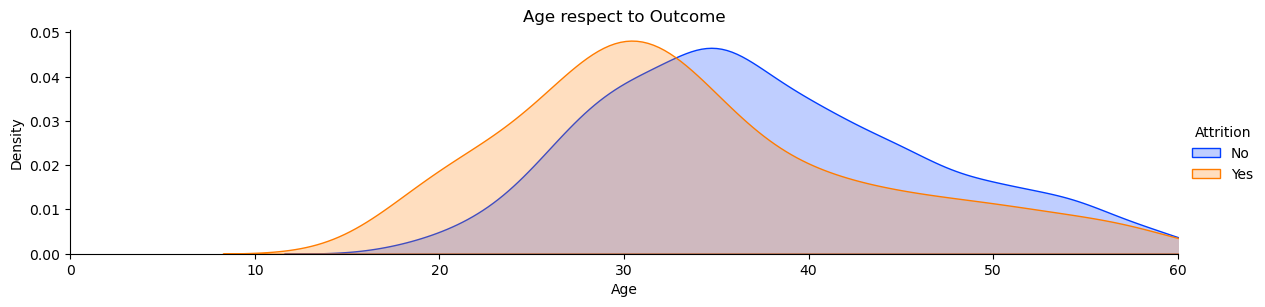

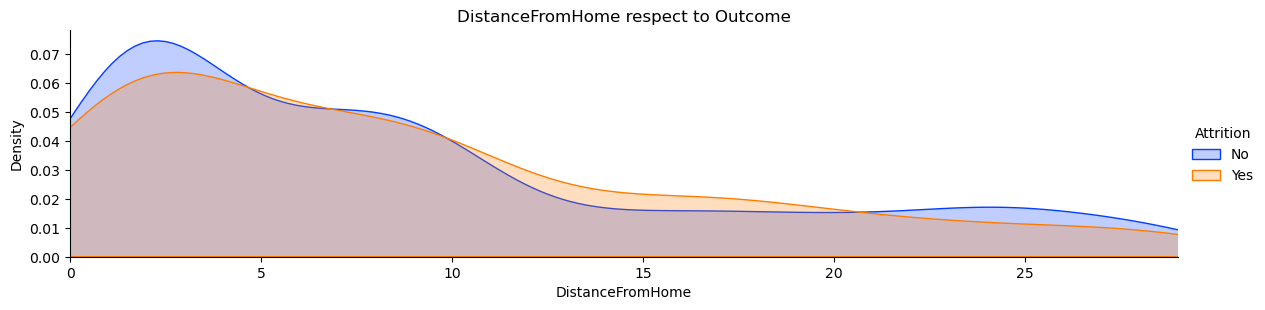

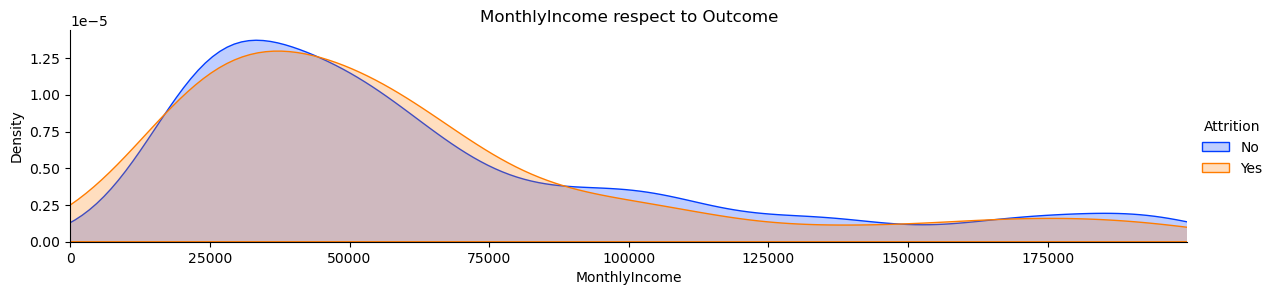

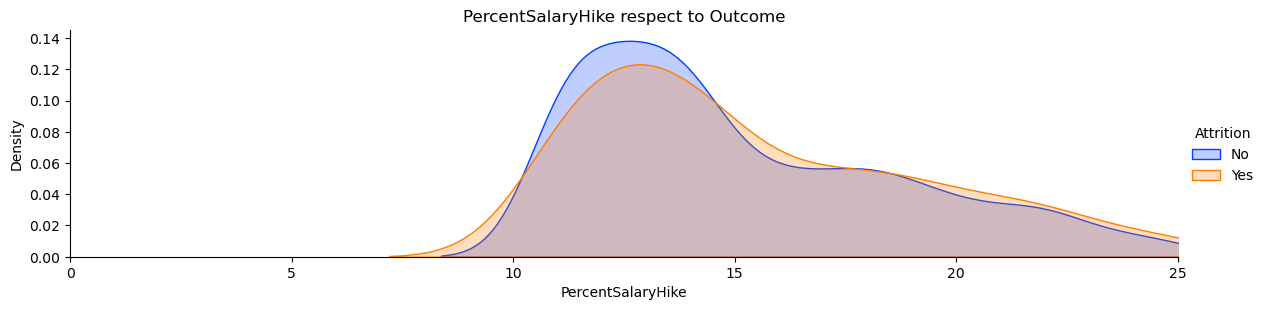

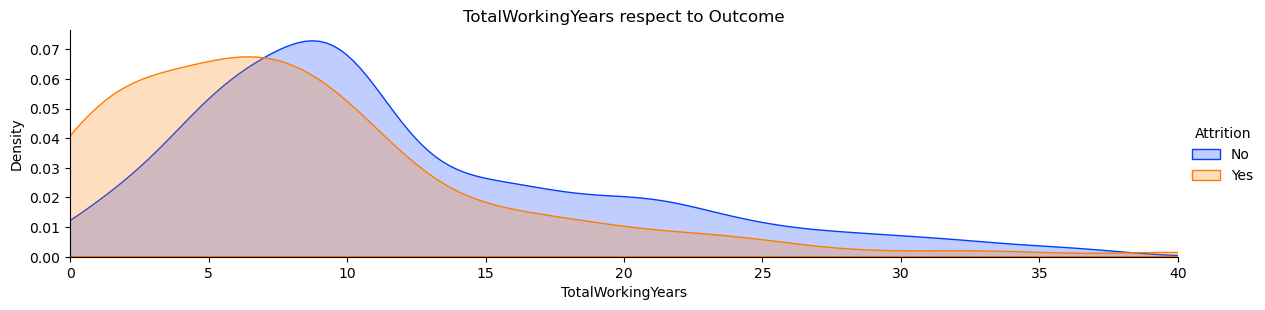

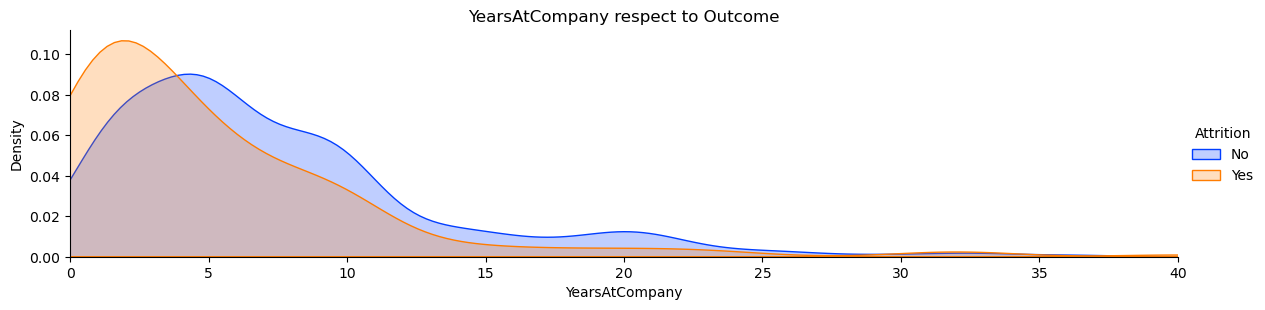

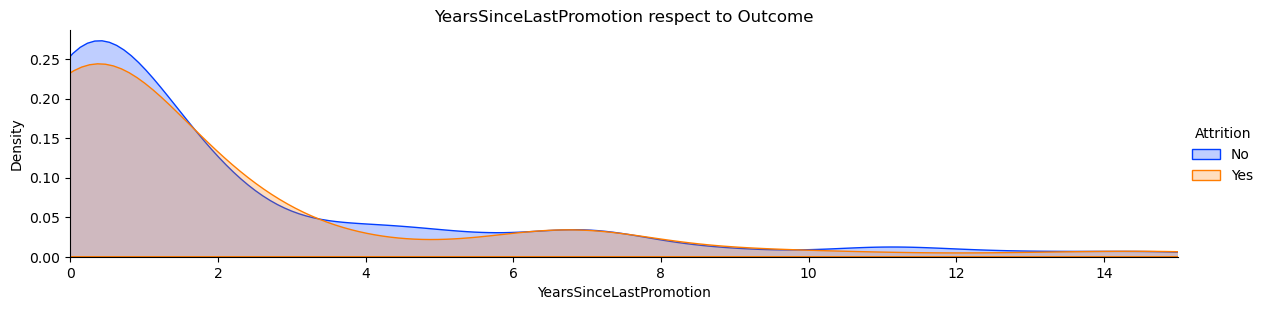

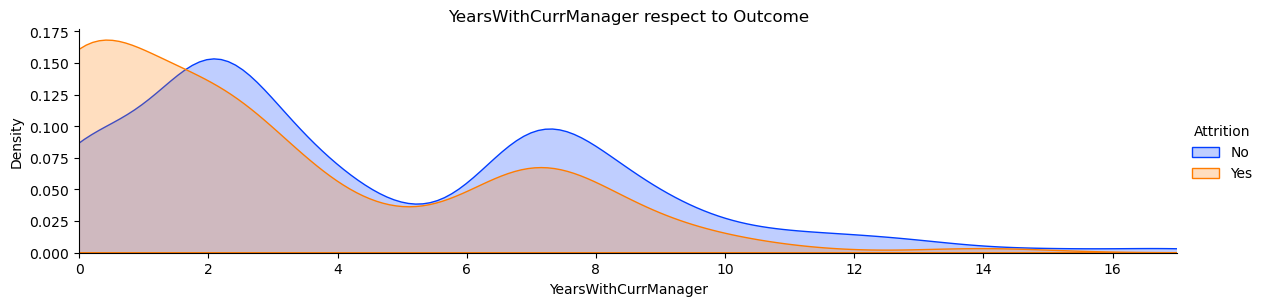

In [28]:
for i in numerical_features:
    plot_kde(i)

### plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot) for each numerical feature

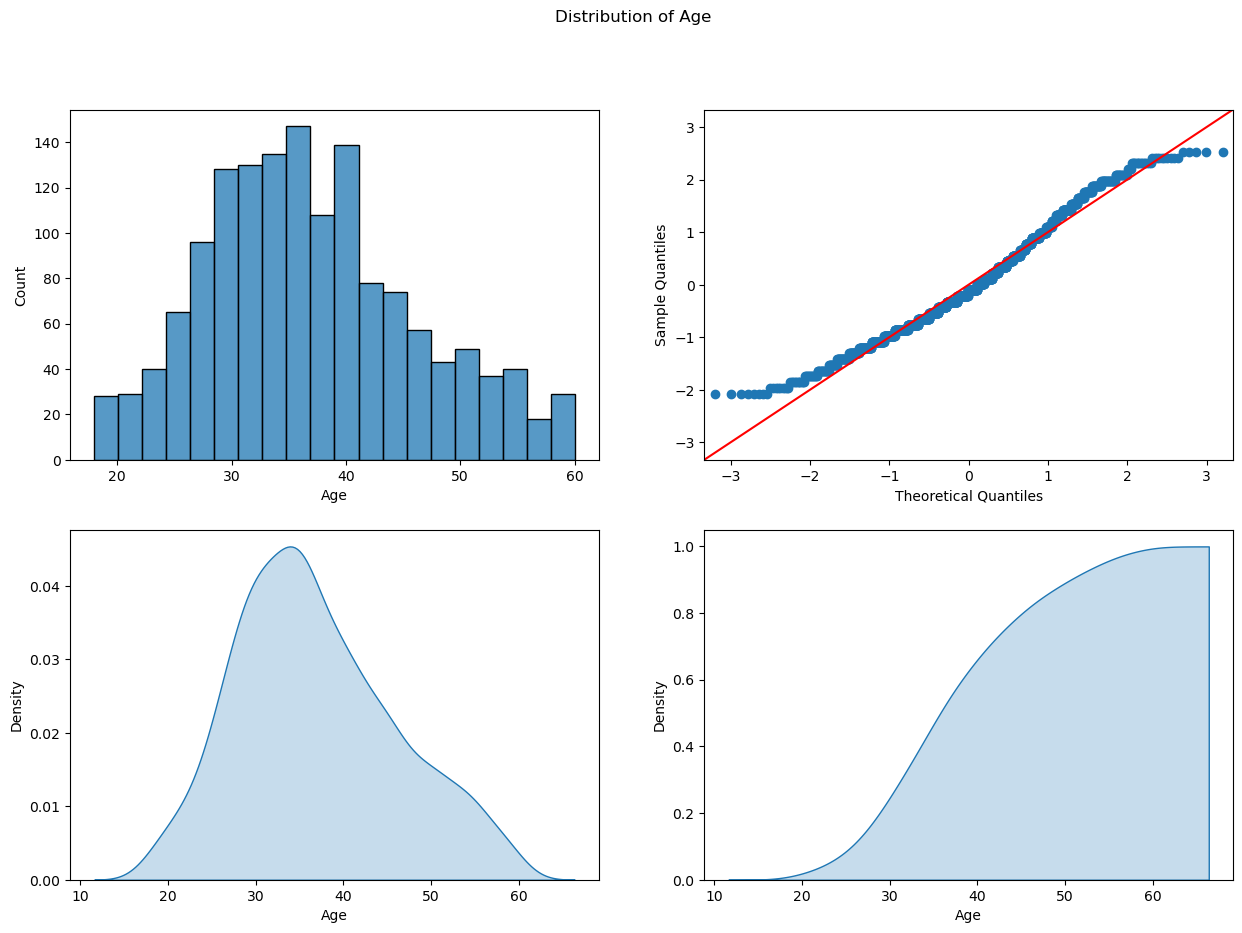

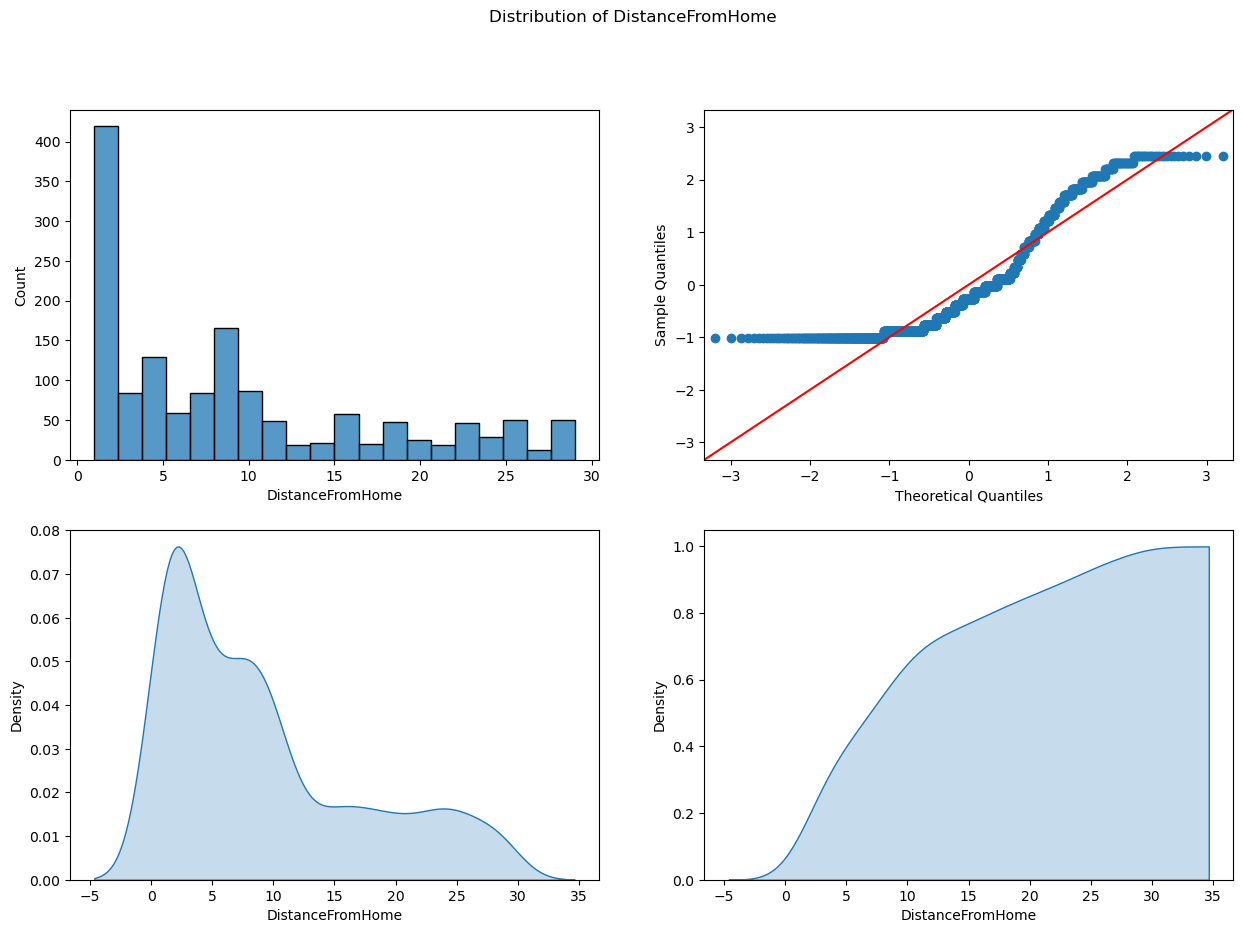

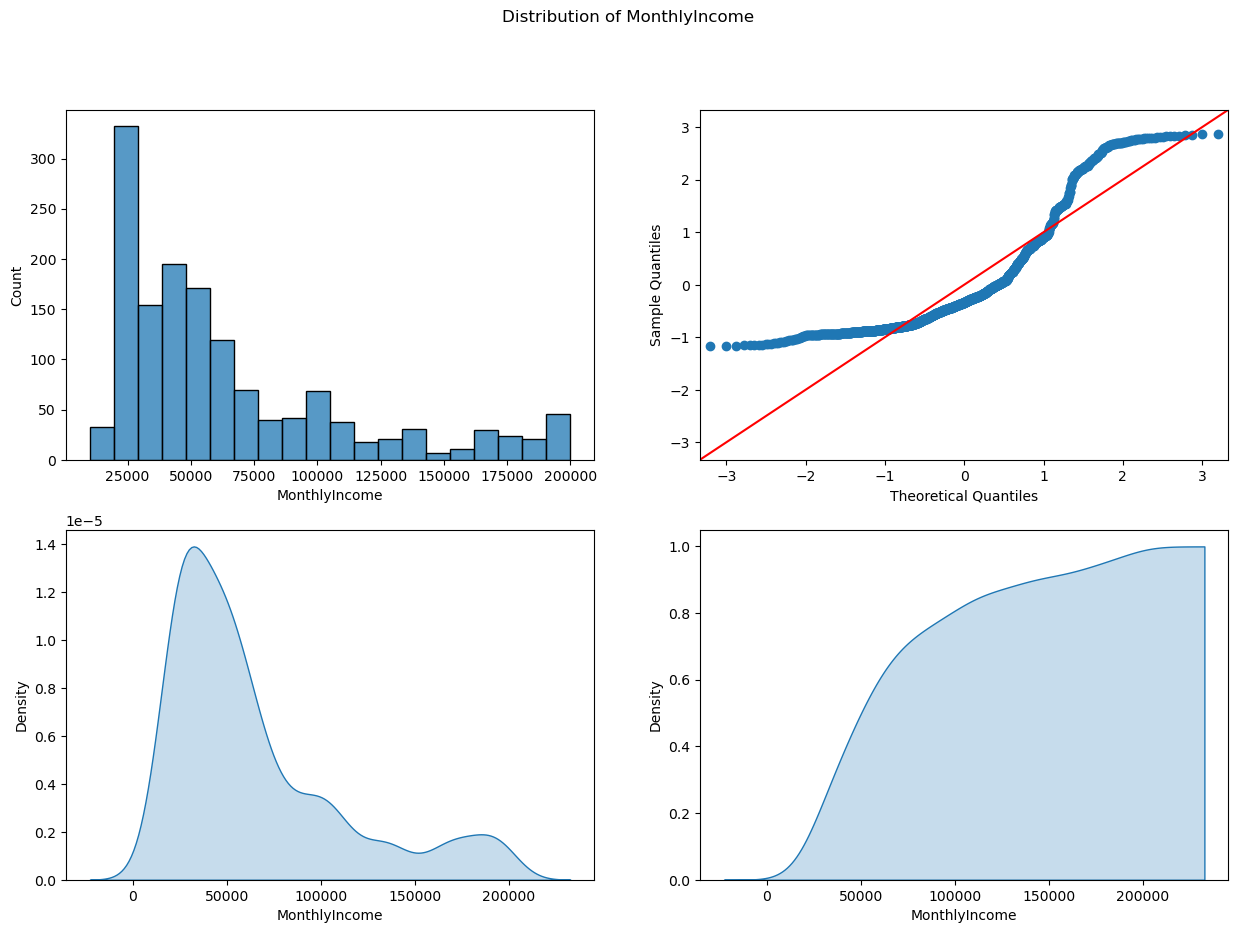

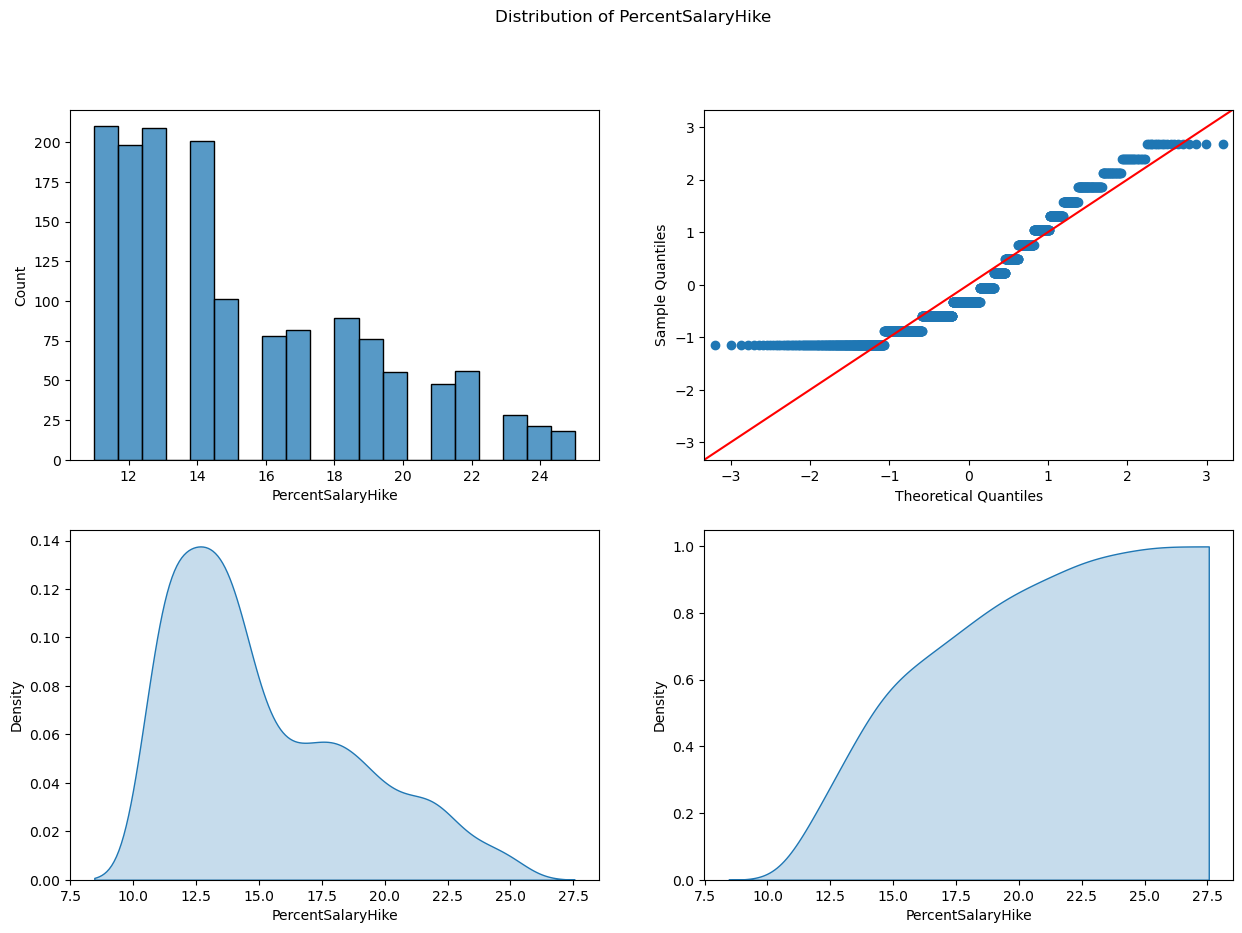

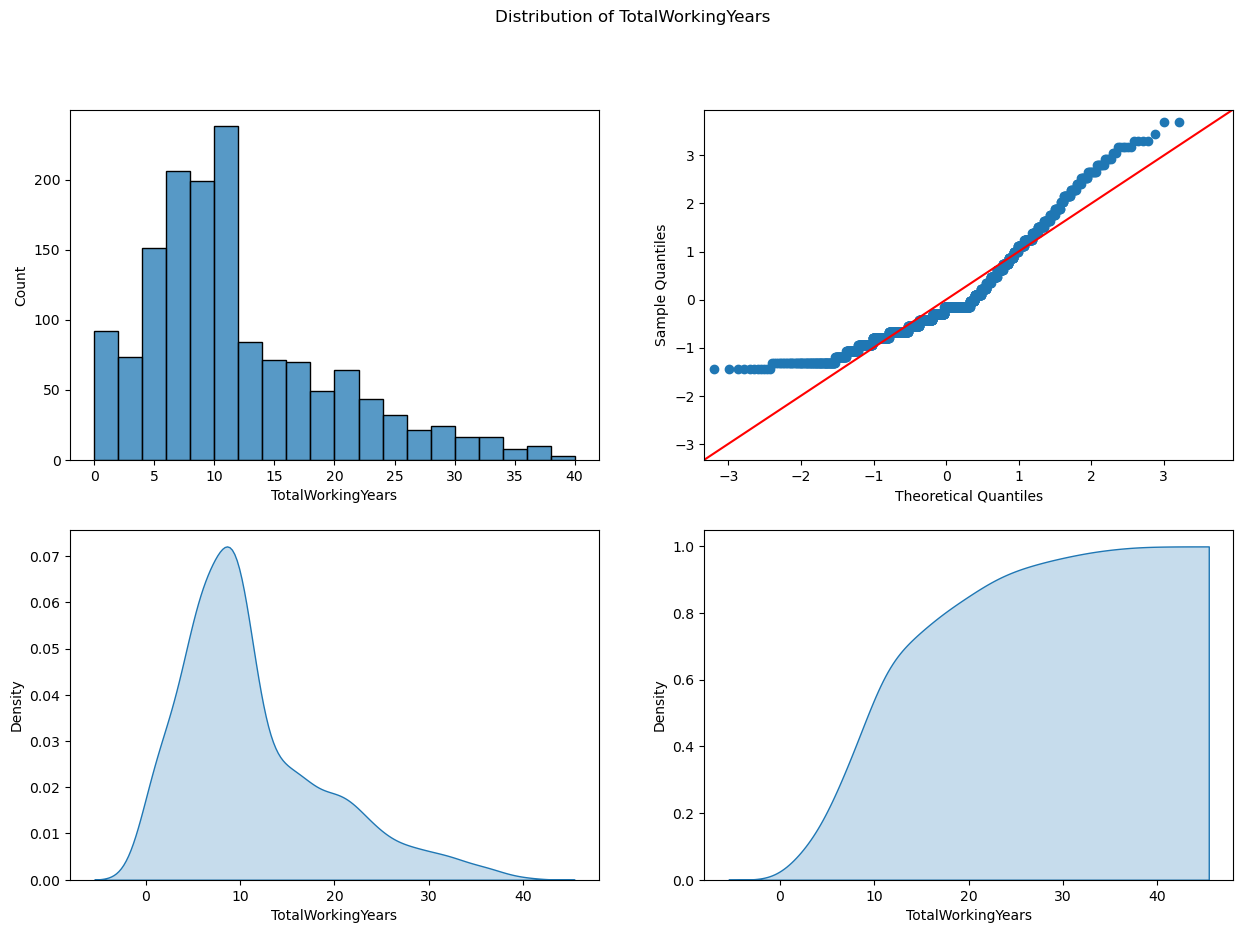

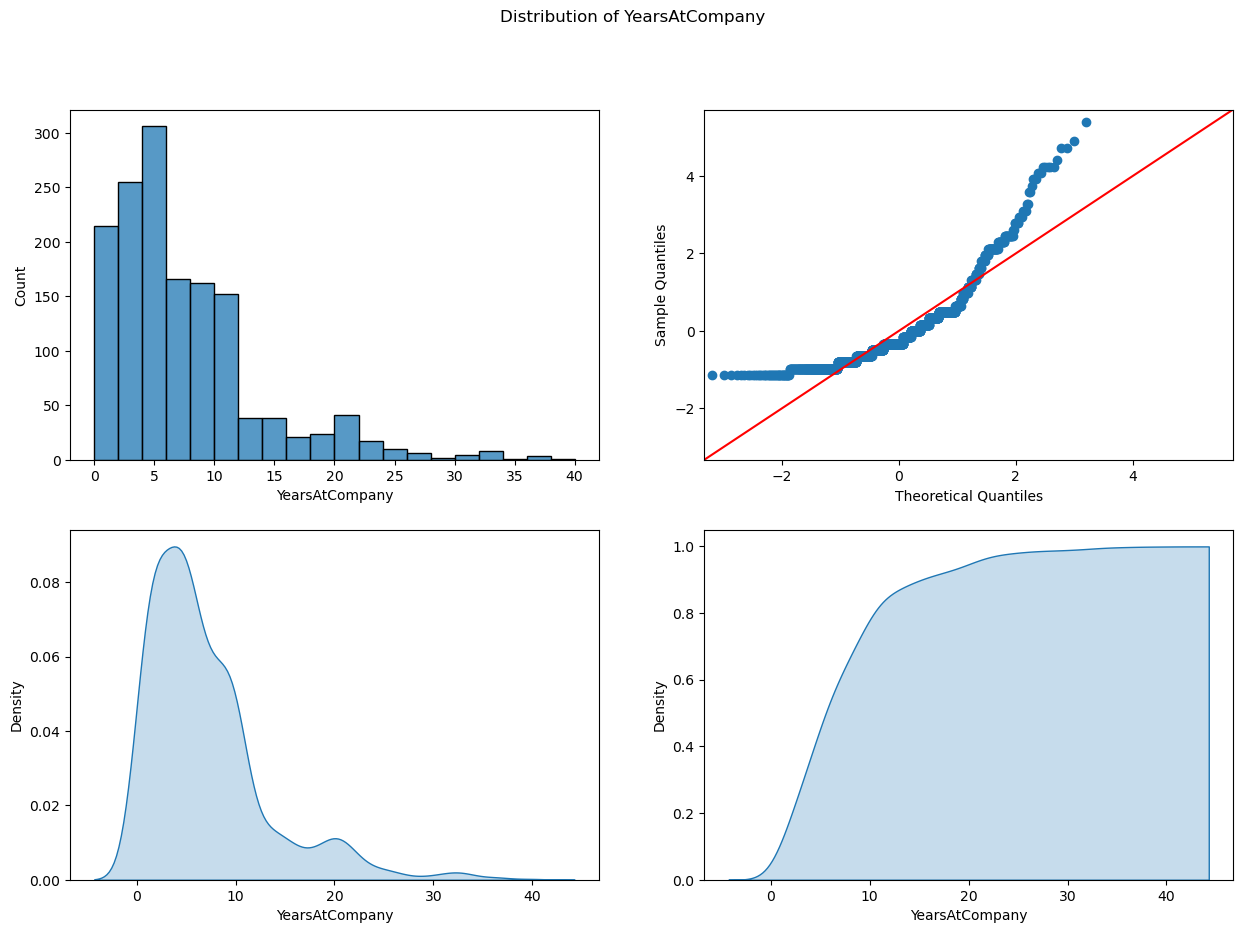

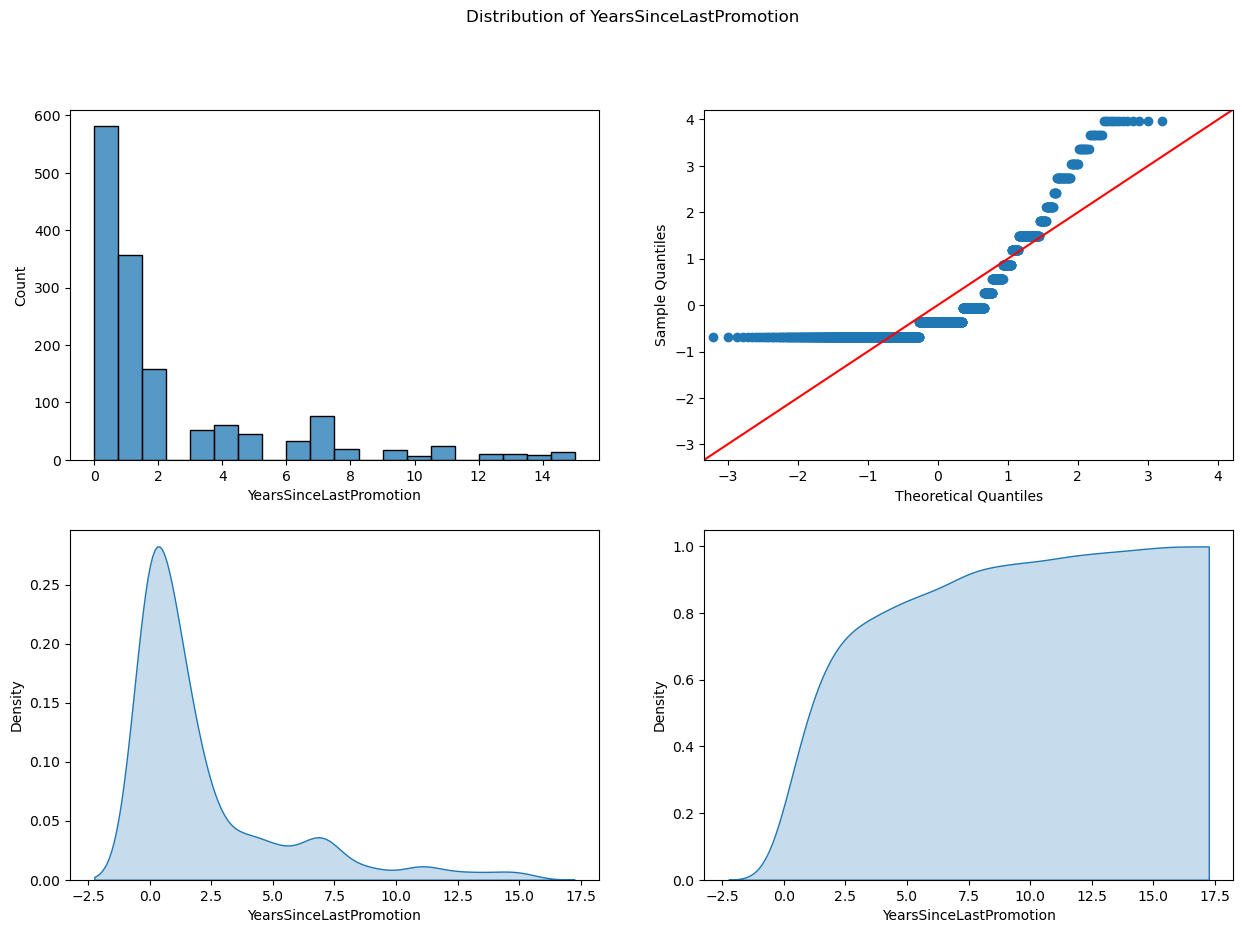

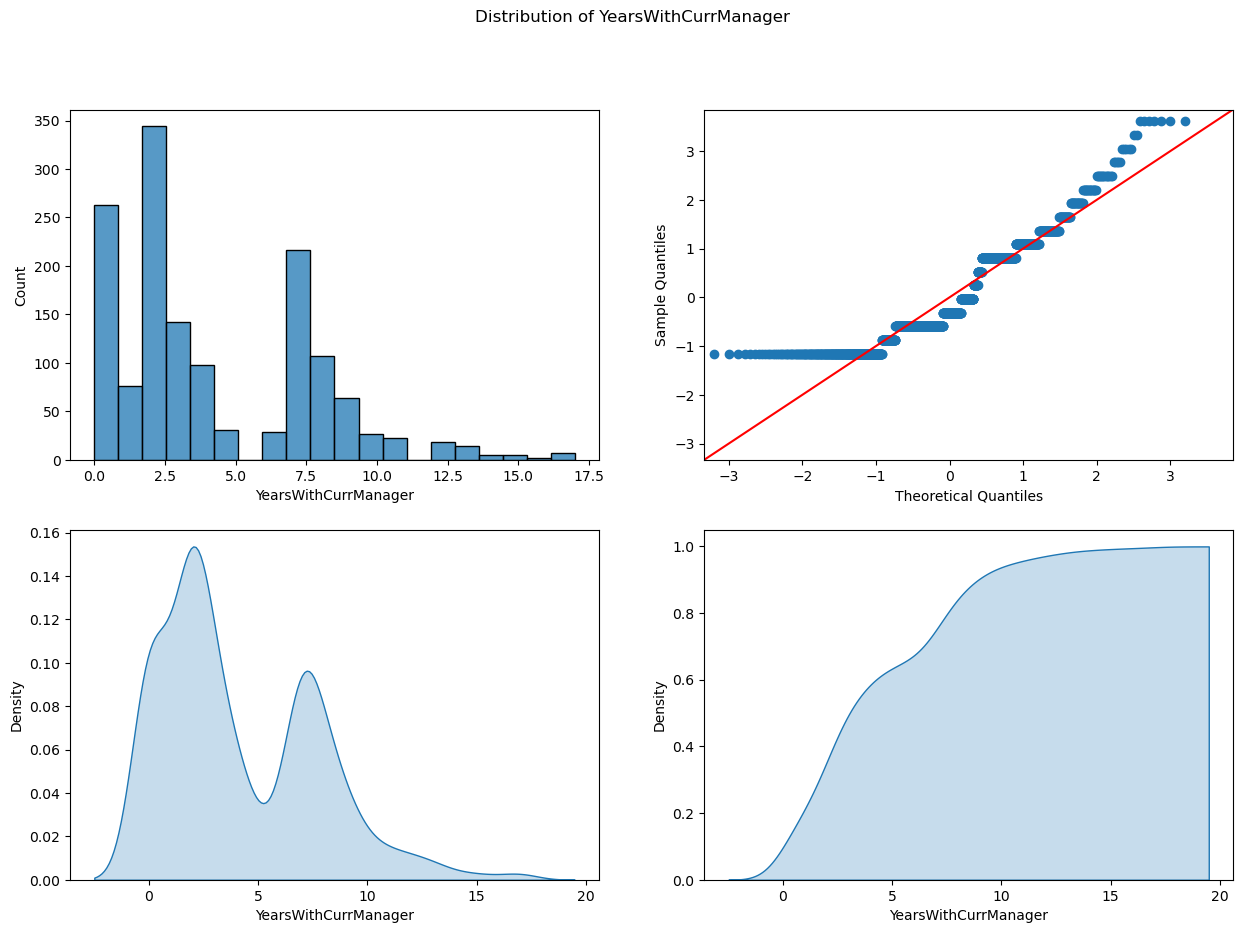

In [29]:
for i in numerical_features:
    plot_distribution(i)

### plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot) for each numerical features

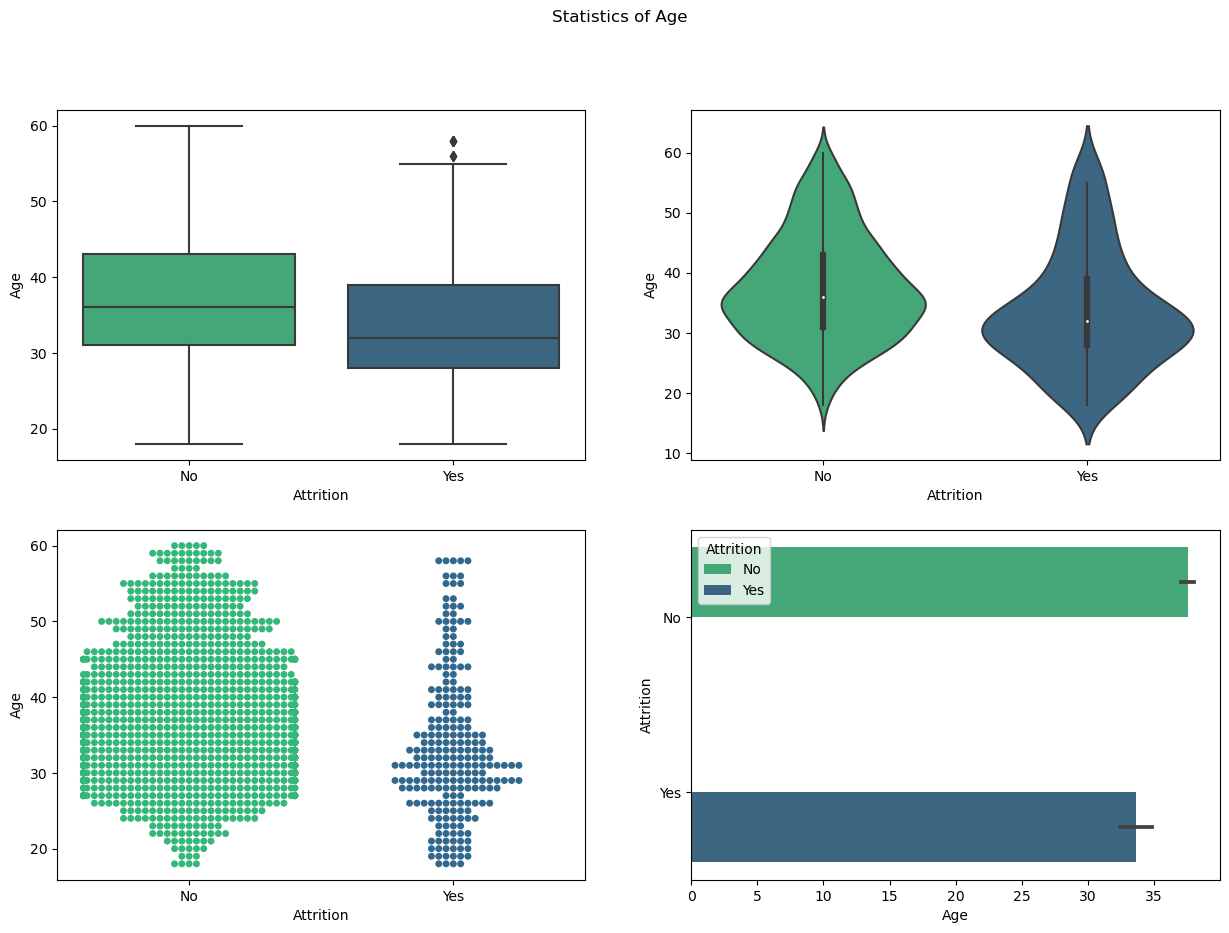

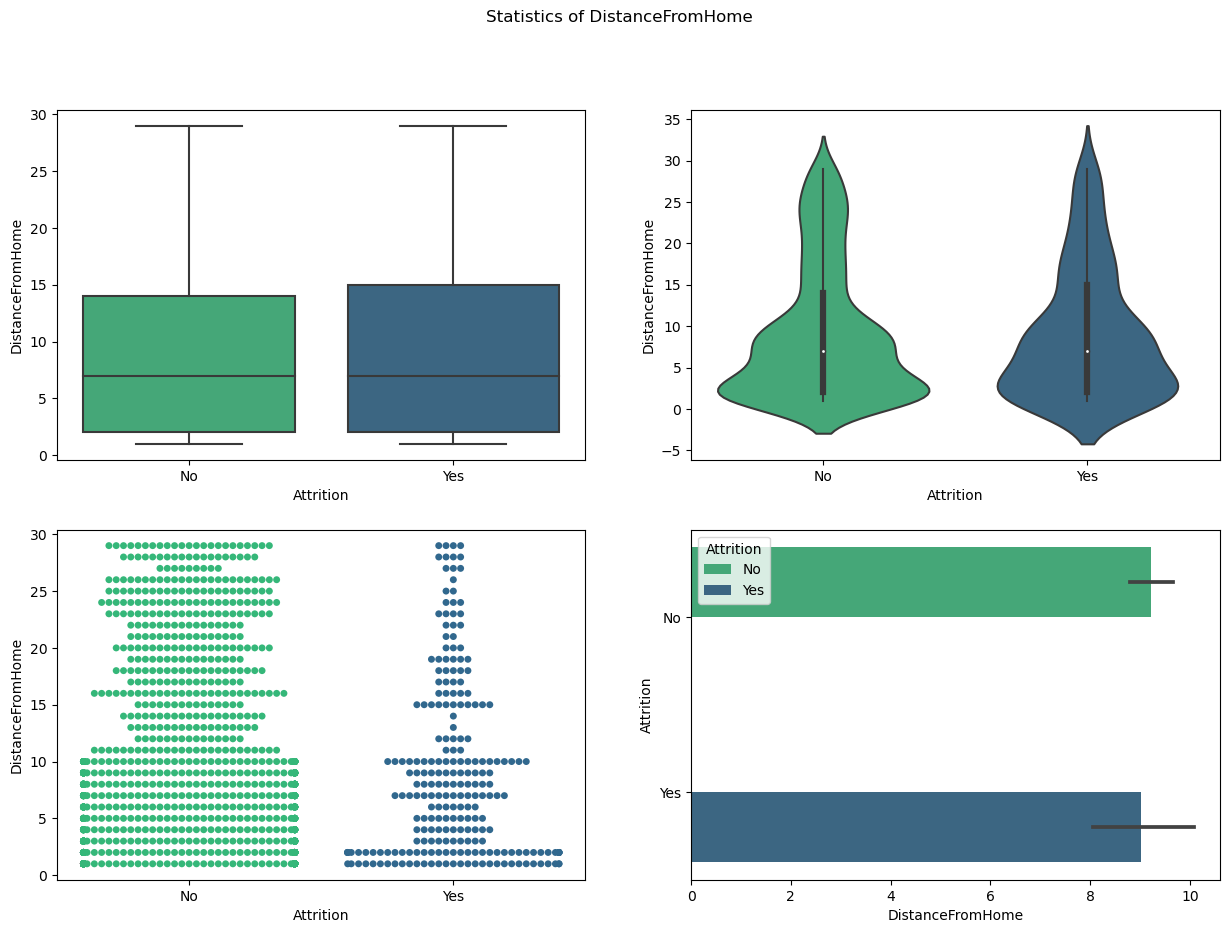

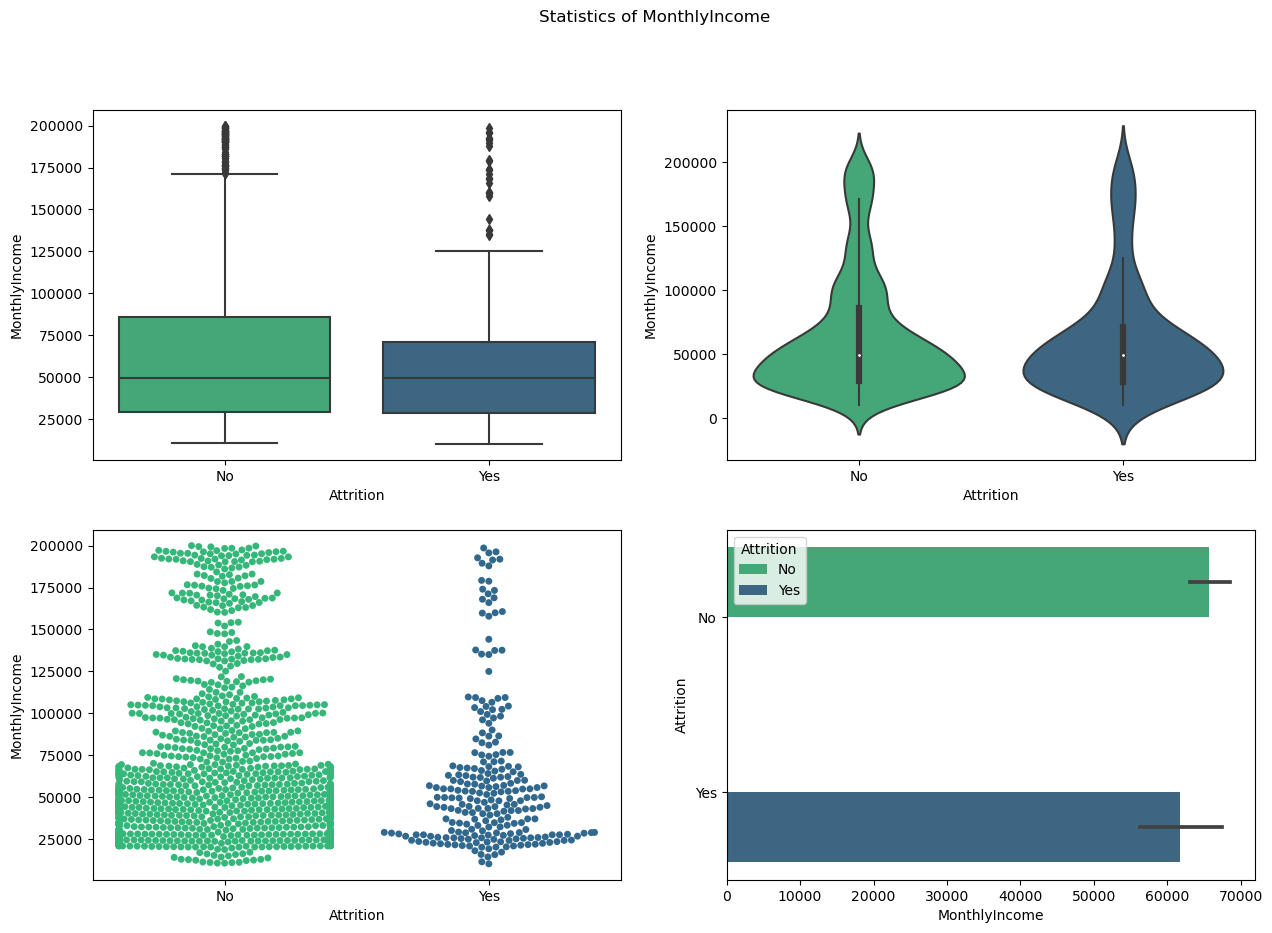

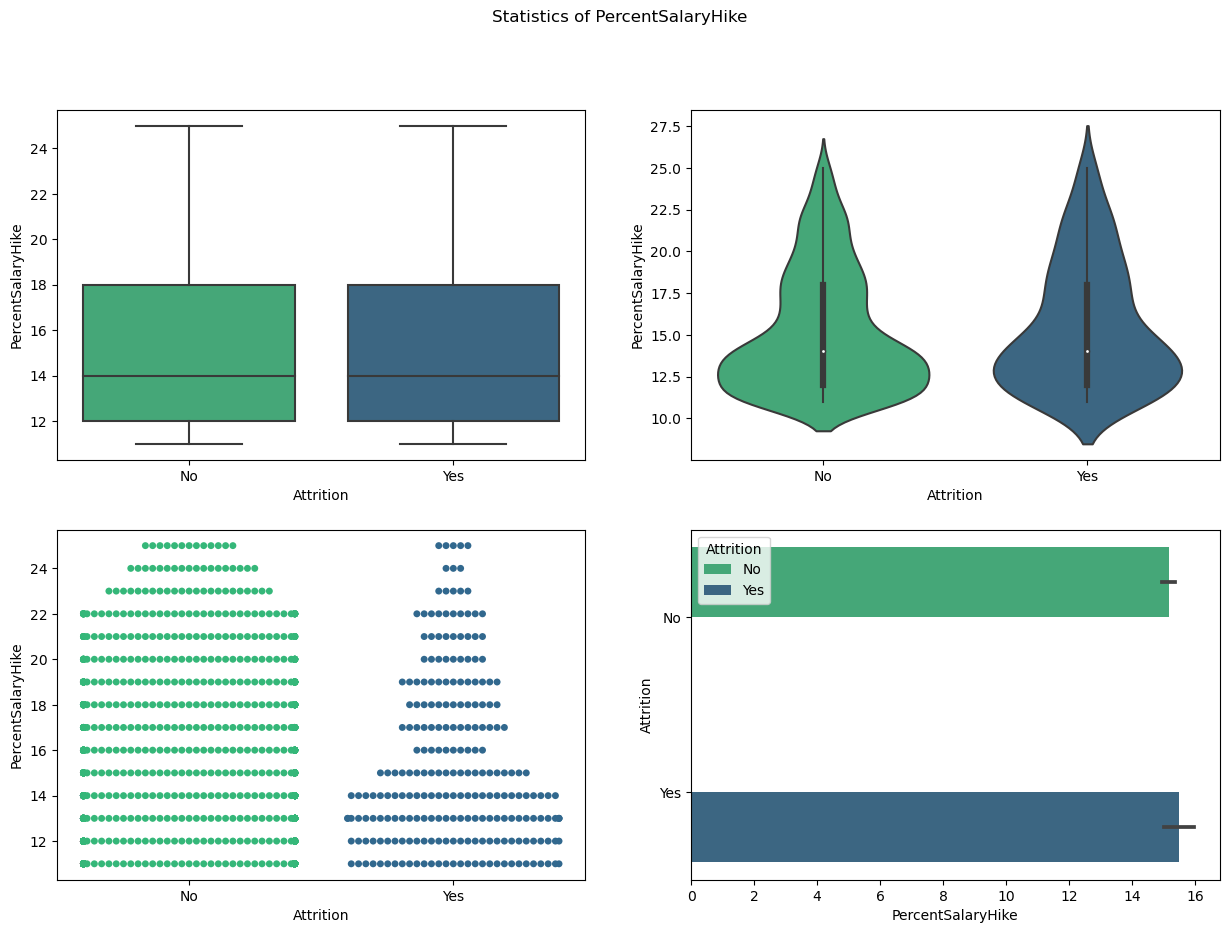

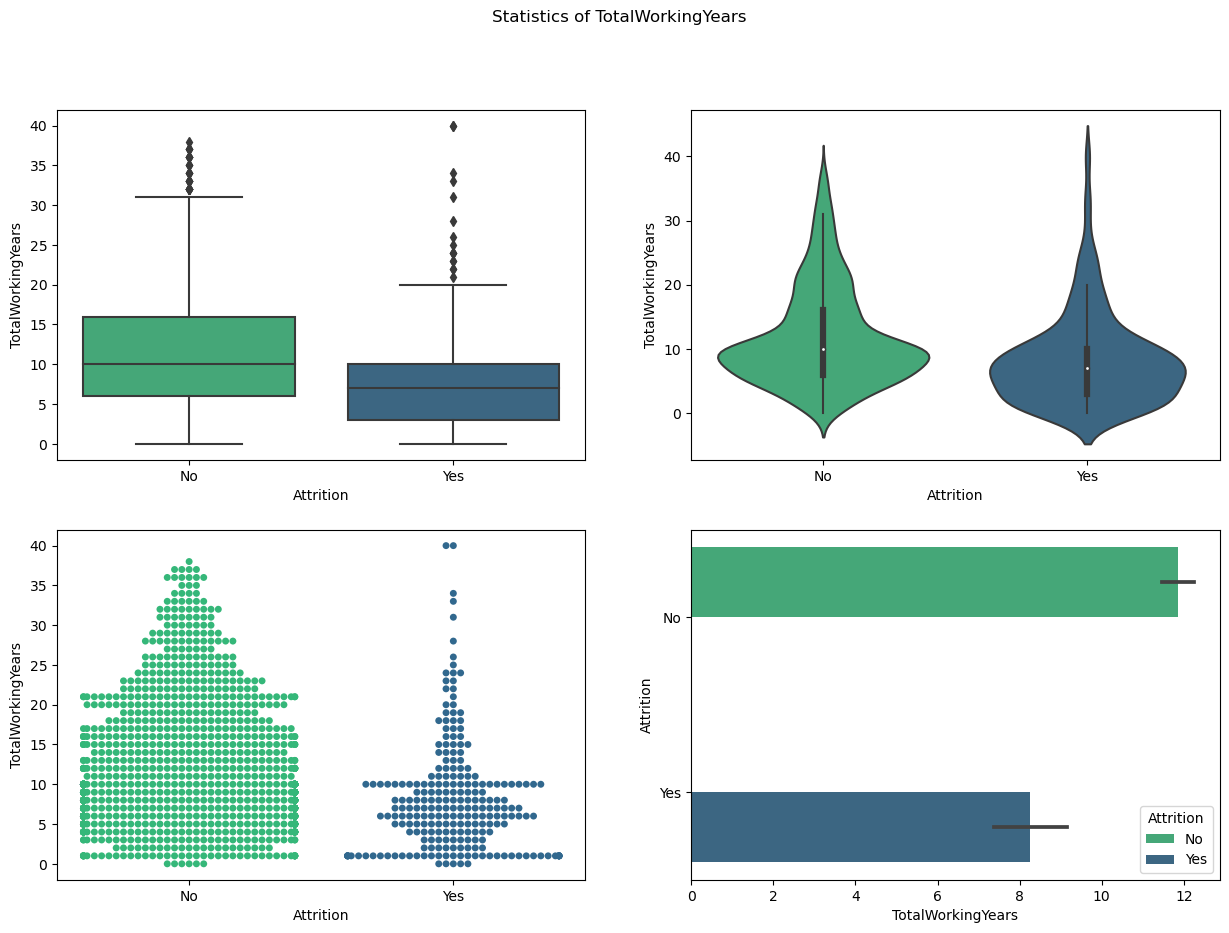

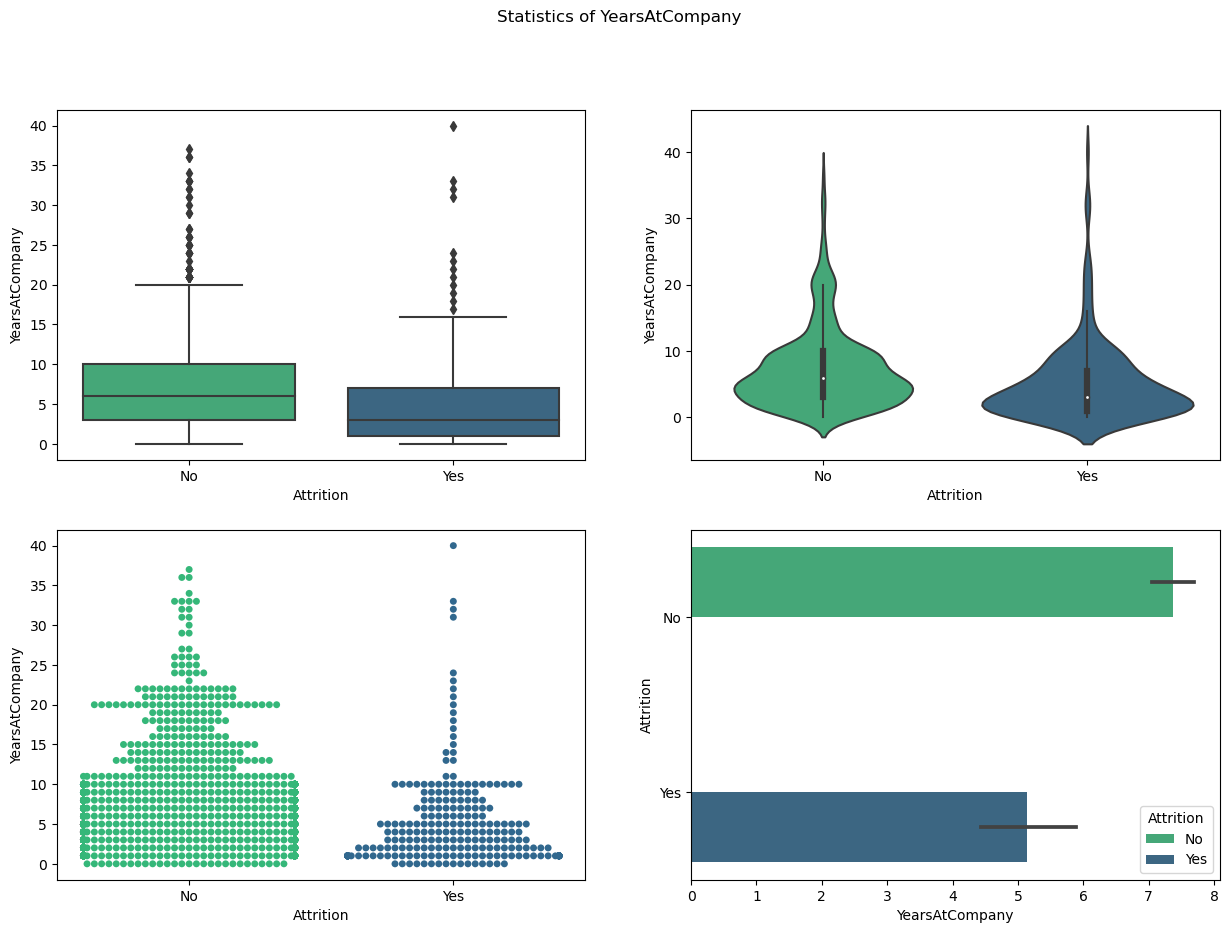

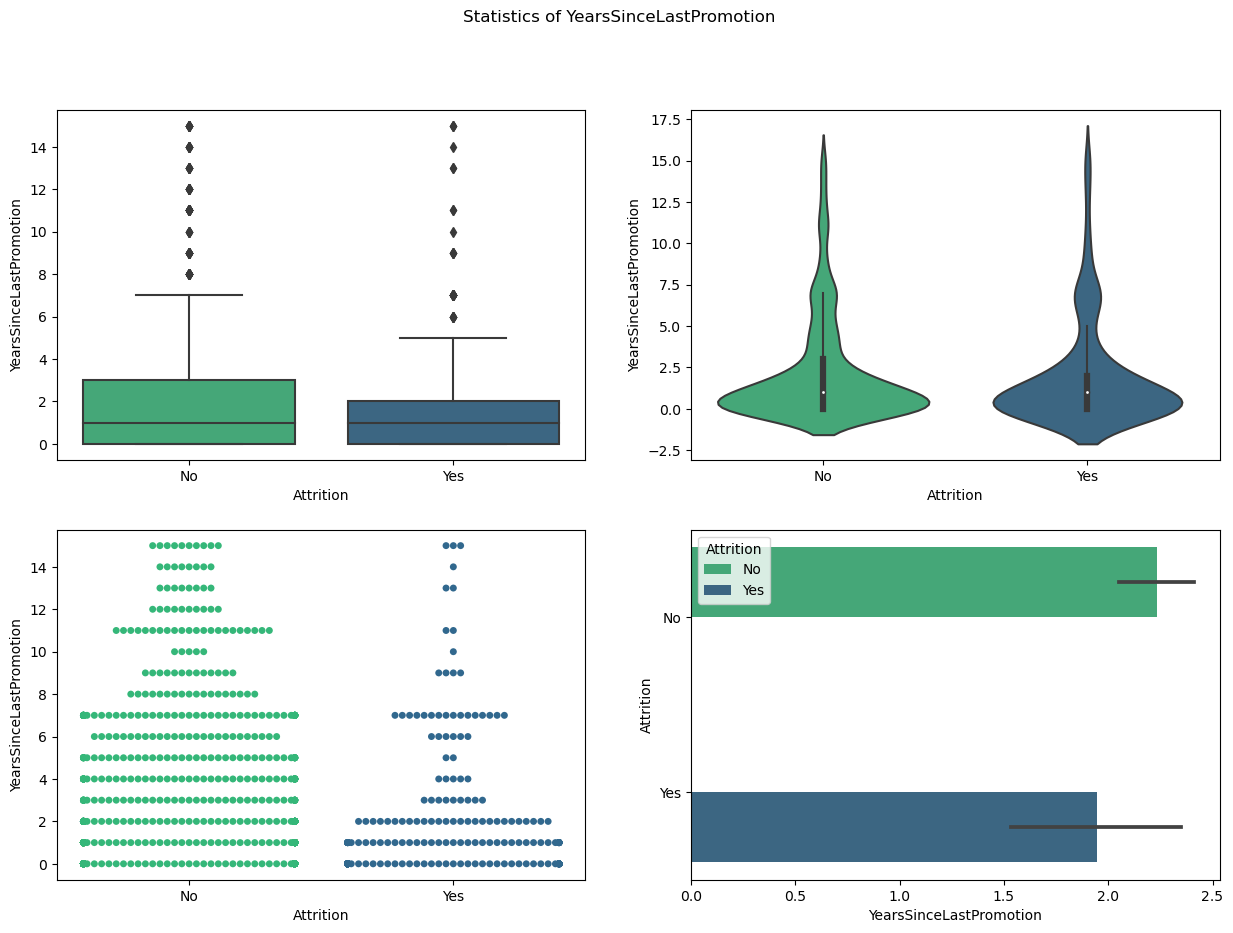

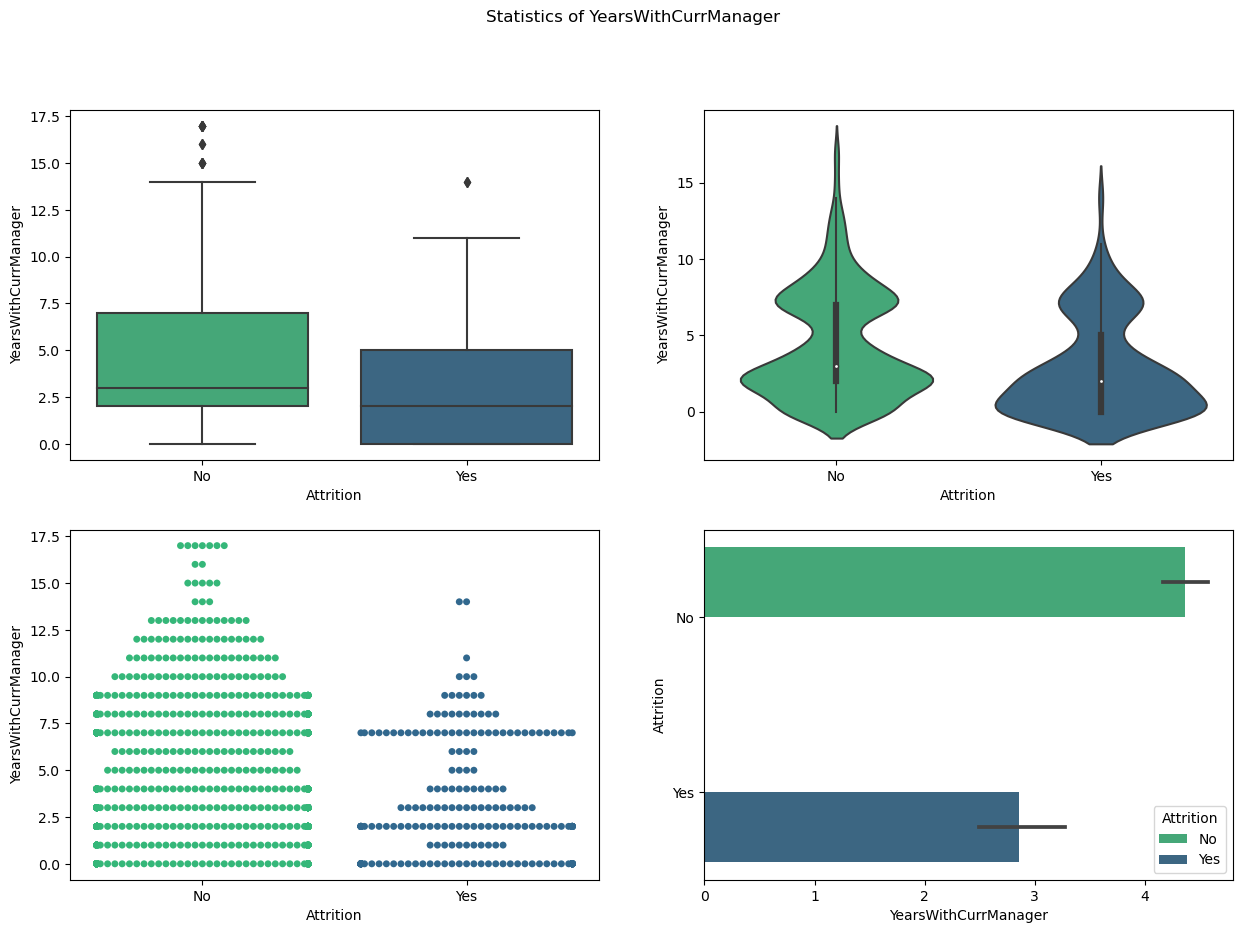

In [30]:
for i in numerical_features:
    plot_stats(i)

## PairPlot

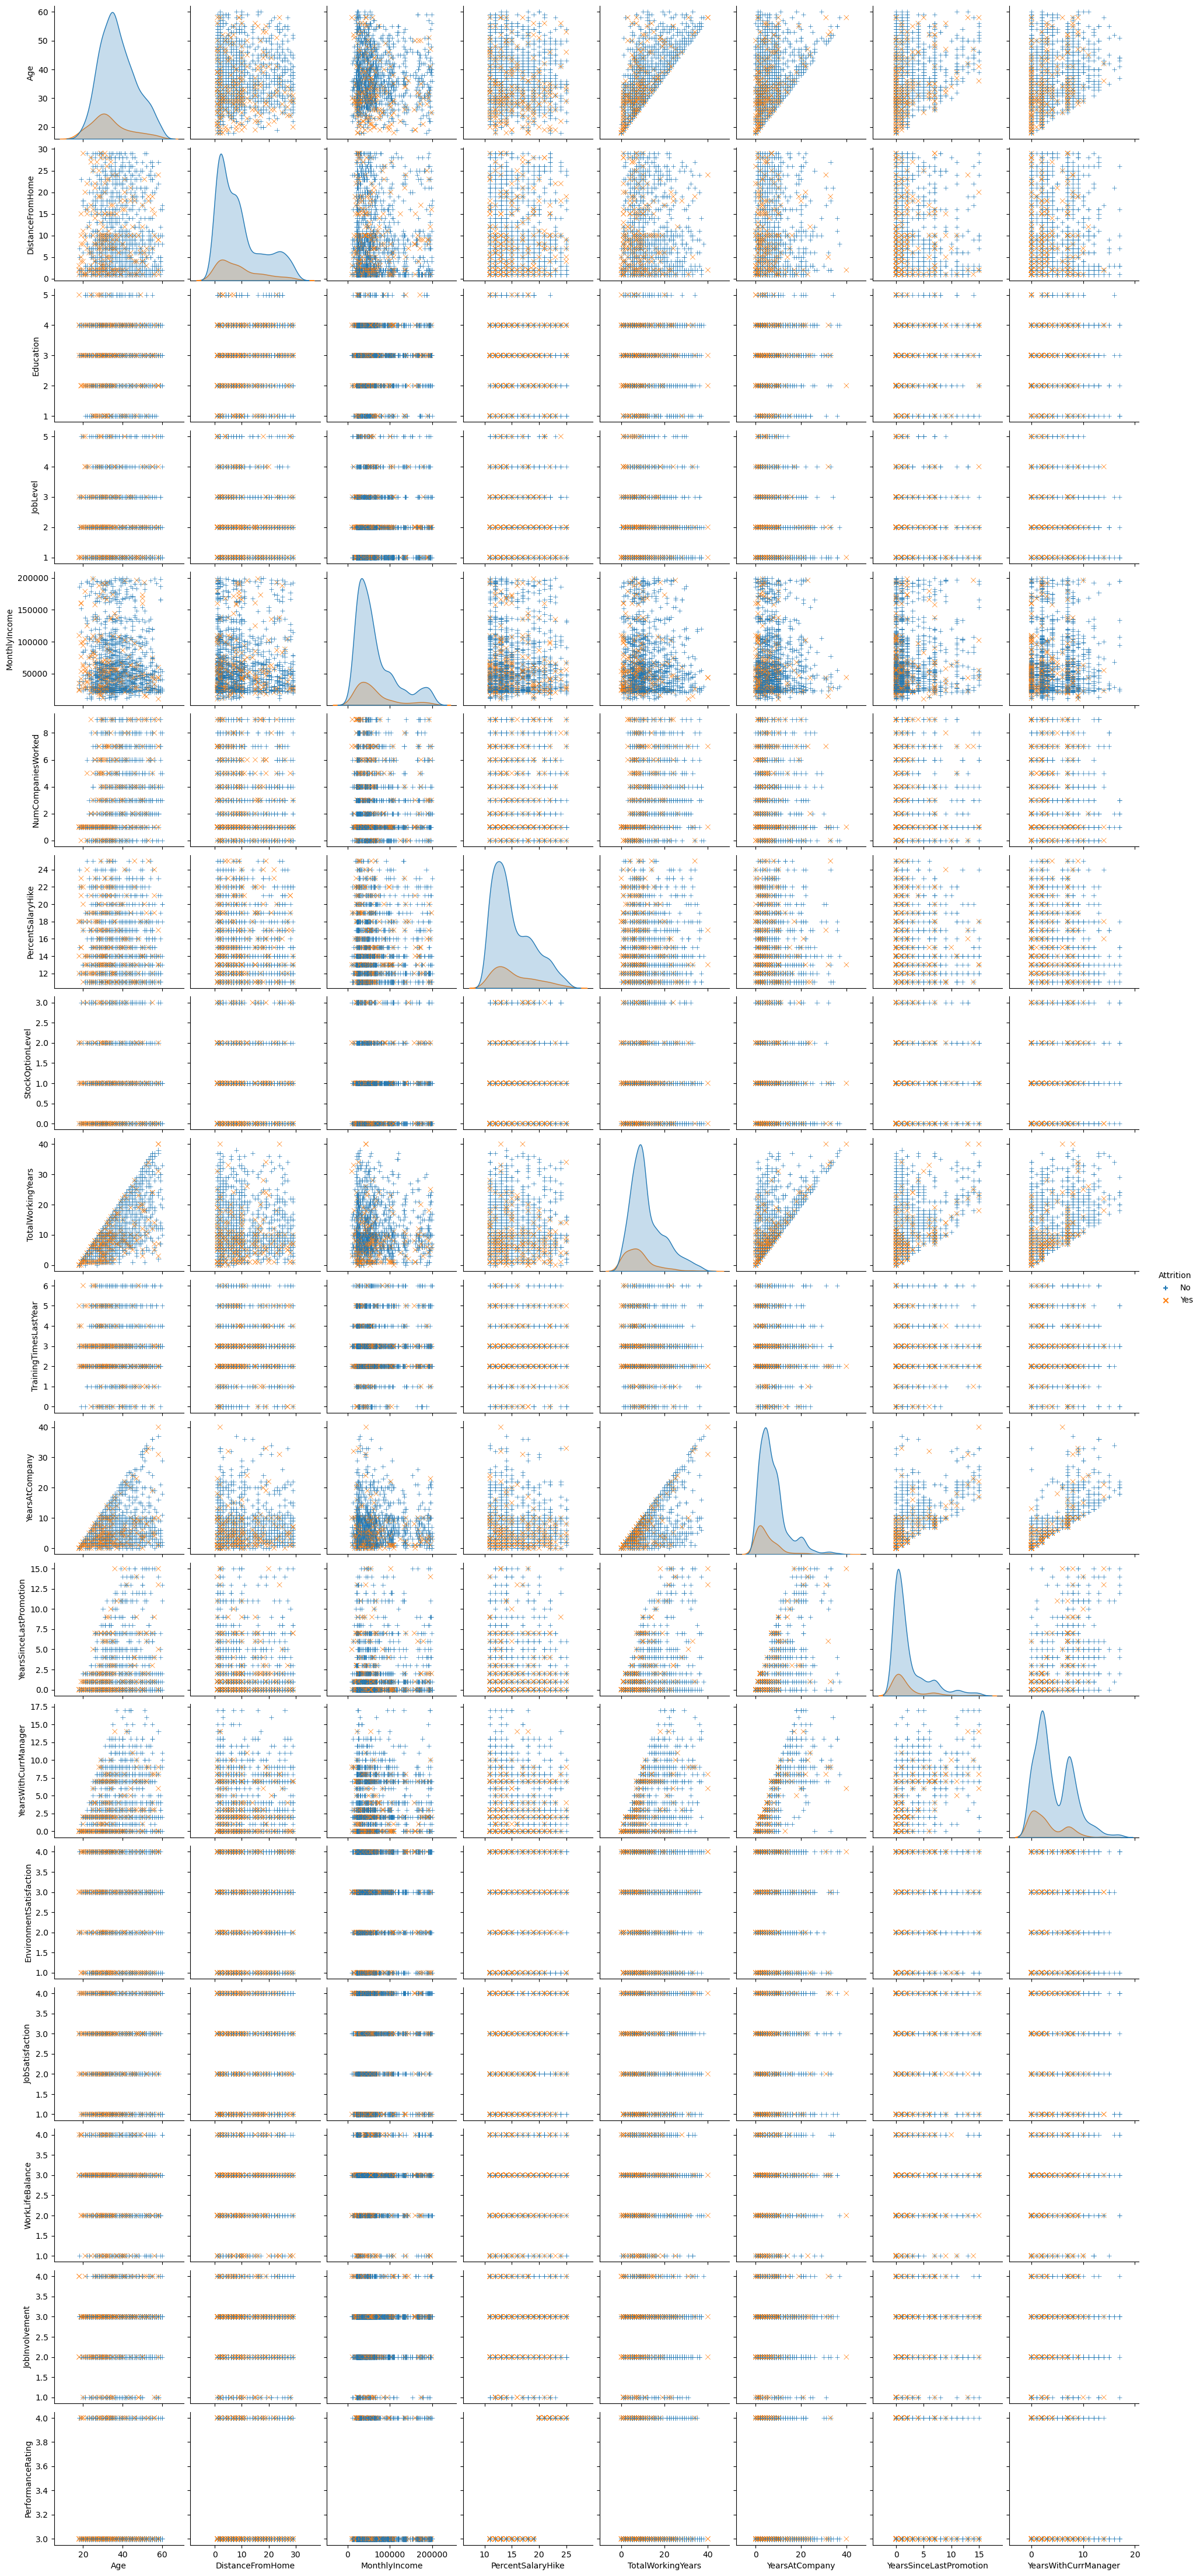

In [33]:
sns.pairplot(
    df,
    hue="Attrition",
    x_vars=numerical_features,
    markers=["+", "x"],
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

# Observations after EDA:
Here are some key observations from the exploratory data analysis (EDA) related to employee attrition:

1. Gender Disparity: Female employees exhibit a higher attrition rate compared to their male counterparts.

2. Income Impact: Employees with low monthly income are more likely to leave the company.

3. Salary Percentage: A low percentage of salary relative to expectations can lead to employee resignation.

4. Manager Frequency: Frequent changes in managers correlate with higher attrition rates.

5. Performance Rating: Employee attrition is influenced by performance ratings.

6. Work Experience: The total number of working years at the company affects attrition, with longer tenure potentially reducing it.

7. Age Group: Most departing employees fall within the age range of 25 to 35.

8. Satisfaction Trends: Increasing employee satisfaction and improving the work environment can contribute to reducing attrition.

### Changing the dtype

In [34]:
## Features to change
features_to_change=[]
for i in df.columns:
    if(df[i].dtype=='object'):
        features_to_change.append(i)
features_to_change

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [35]:
 ## transforming categorical features to numerical (using labelEncoding technique)
df1=df.copy()
le=LabelEncoder()
for i in categorical_features:
    df1[i]=le.fit_transform(df[i])
    
df1.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51          0               2           2                 6          1   
1   31          1               1           1                10          0   
2   32          0               1           1                17          3   
3   38          0               0           1                 2          4   
4   32          0               2           1                10          0   

   EducationField  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0               1       0         0        0              1         131160   
1               1       0         0        6              2          41890   
2               4       1         3        7              1         193280   
3               1       1         2        1              1          83210   
4               3       1         0        7              2          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                   1                 11                 0                1.0   
1                   0                 23                 1                6.0   
2                   1                 15                 3                5.0   
3                   3                 11                 3               13.0   
4                   4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  EnvironmentSatisfaction  JobSatisfaction  \
0                     0                        2                3   
1                     4                        2                1   
2                     3                        1                1   
3                     5                        3                3   
4                     4                        3                0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  
0                1               2                  0  
1                3               1                  1  
2                0               2                  0  
3                2               1                  0  
4                2               2                  0

## correlation

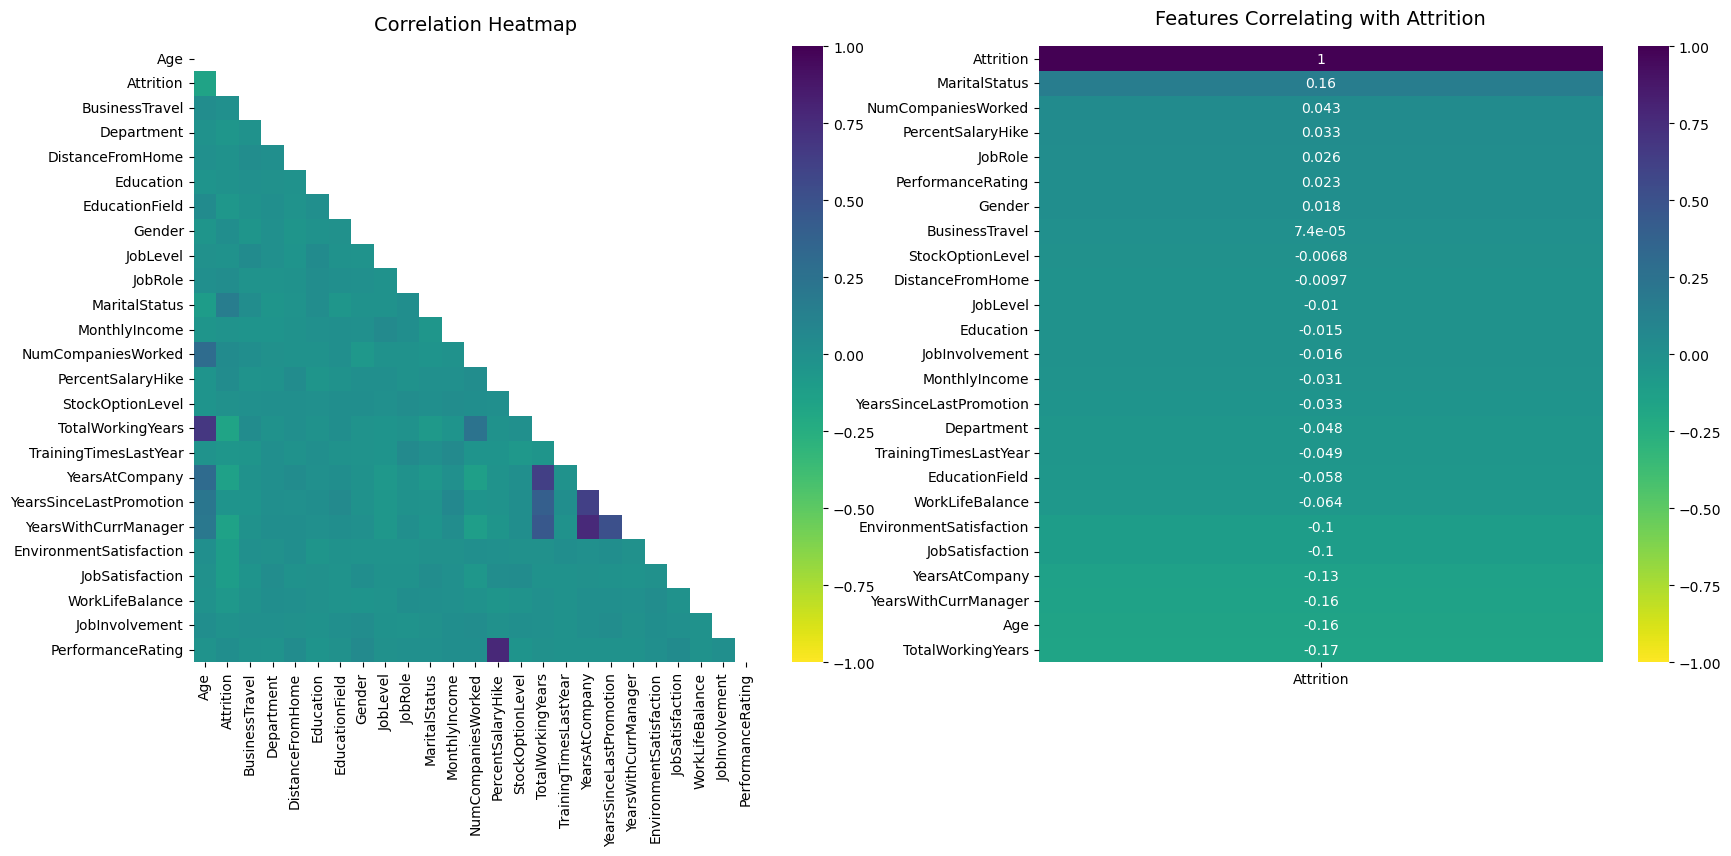

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df1.corr()  # calculate correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(
    df1.corr(), mask=mask, vmin=-1, vmax=1, annot=False, ax=ax[0], cmap="viridis_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["Attrition"]].sort_values(by="Attrition", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'
heatmap.set_title(
    "Features Correlating with Attrition",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot